# Global Power Plant Database

## Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database
#### The database includes the following indicators: 

•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation.

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction 

1.Primary Fuel    
2.capacity_mw 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, explained_variance_score, median_absolute_error, max_error,accuracy_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,ExtraTreesRegressor, AdaBoostRegressor

from sklearn.neighbors import KNeighborsRegressor


In [2]:
df = pd.read_csv("C:/Users/KHUSHBOO RANI/OneDrive/Desktop/Projects/ML project/global power.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [4]:
df.tail(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
897,IND,India,Wind power project by Riddhi Siddhi Gluco Biol...,WRI1026753,34.65,8.8709,77.4466,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
898,IND,India,Wind power project in Rajasthan,WRI1026769,42.00,27.1715,70.6877,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
899,IND,India,YAMUNANAGAR TPP,IND0000511,600.00,30.1081,77.3257,Coal,Oil,NaN,...,2019.0,NaN,3194.35982,3709.552200,3123.572061,3156.053669,3039.66118,NaN,Central Electricity Authority,NaN
900,IND,India,YASHWANTRAO MOHITE,WRI1019995,16.00,17.1653,74.2456,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,IND,India,YELHANKA (DG),IND0000512,106.60,13.1156,77.5838,Oil,NaN,NaN,...,2019.0,NaN,0.00000,0.000000,0.000000,NaN,0.00000,NaN,Central Electricity Authority,NaN
902,IND,India,YERMARUS TPP,IND0000513,1600.00,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.50000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.00,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.50,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.00,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.50,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.sample(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
705,IND,India,SHAHPUR,IND0000402,6.6,NaN,NaN,Hydro,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,IND,India,Charanka Solar Power Plant,WRI1026129,221.0,23.9070,71.1881,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
707,IND,India,SHARAVATHY,IND0000404,1035.0,14.2352,74.7673,Hydro,NaN,NaN,...,2019.0,NaN,5229.18270,2651.17750,2695.22615,2708.73825,4762.24910,NaN,Central Electricity Authority,NaN
270,IND,India,Horti Solar Power Plant,WRI1026146,20.0,17.9054,76.3224,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,IND,India,GRACE INDUSTRIES,WRI1019956,25.0,20.0058,79.1845,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
151,IND,India,CHUZACHEN,IND0000085,110.0,27.2093,88.6659,Hydro,NaN,NaN,...,2019.0,NaN,428.70570,419.32285,492.27625,442.56605,415.31300,NaN,Central Electricity Authority,NaN
313,IND,India,KALINADI,IND0000174,855.0,15.2761,74.5268,Hydro,NaN,NaN,...,2019.0,NaN,3239.14290,1938.73760,1338.09590,1529.59360,2763.96075,NaN,Central Electricity Authority,NaN
550,IND,India,Nagercoli Wind Farm,WRI1026064,37.6,8.1784,77.6873,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,IND,India,BHAWANI KATTALAI -II,IND0000052,30.0,11.3310,77.7580,Hydro,NaN,NaN,...,2019.0,NaN,136.87220,6.99485,19.73085,37.43190,76.77420,NaN,Central Electricity Authority,NaN
675,IND,India,S.SAROVAR CHPH,IND0000382,250.0,21.8376,73.7559,Hydro,NaN,NaN,...,2019.0,NaN,608.61165,701.02725,871.95830,560.04570,591.86580,NaN,Central Electricity Authority,NaN


## EDA (Exploratory data analysis)

In [6]:
df.shape

(907, 27)

By looking at the column 'country' we can say that it is similar and short form of column name 'country_long'

We can see that our dataset has 27 columns out of which 2 columns are our target variables and remaining 25 are the features.

###### This project defines the "Fuel Type" attribute of our database based on common fuel categories and "Megawatts Capacity" based on electrical generating capacity in megawatts.
##### 1: "primary_fuel" is a target variable
##### 2: "capacity_mw" is also a target variable

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

We can see that our dataset is having 12 object data types and 15 numerical data types.

In [9]:
# Lets check number of unique values of each columns:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

As per above observations, we can see that coloumns with No unique values are "other_fuel3, weep_id, generation_gwh_2013,generation_gwh_2019, estimated_generation_gwh, as there is no data we can drop this columns.

Similarly columns with only single unique values are "country, country_long, other_fuel2, year_of_capacity_data, generation_data_source", we will need to check this columns and then work on it

In [10]:
# checking duplicates and removing it

print("Before removing duplicates:", df.duplicated().sum())

df = df[~df.duplicated()]

print("After removing duplicates:", df.duplicated().sum())

Before removing duplicates: 0
After removing duplicates: 0


In [11]:
#Exploring the data of target variable:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

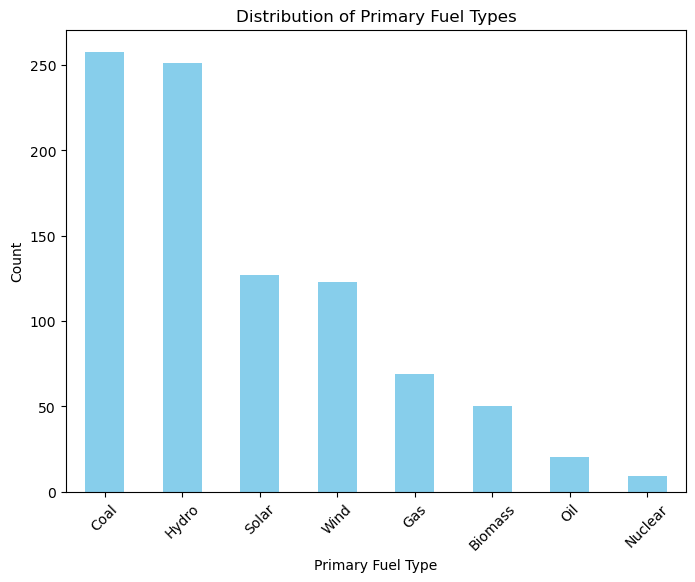

In [12]:
value_counts = df['primary_fuel'].value_counts()
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [13]:
#Exploring the data of target variable:
df.capacity_mw.value_counts()

capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64

In [14]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values for {column}:')
    print(unique_values)
    print('\n')


Unique values for country:
['IND']


Unique values for country_long:
['India']


Unique values for name:
['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 'Askandra - Finehope Solar Power Plant'
 'Askandra - Khaya Solar Power Plant'
 'Askandra - Newton Solar Power Plant'
 'Askandra - Saidham Solar Power Plant'
 'Askandra - Vasavi Solar Power Plant' 'BADARPUR' 'BAGALKOT ICP'

In [15]:
#removing country and Country_long containing same value, so they are not relavent

df.drop(columns=["country","country_long","other_fuel2", "year_of_capacity_data","generation_gwh_2013","other_fuel3","wepp_id","generation_gwh_2019","estimated_generation_gwh","generation_data_source"],axis=1,inplace=True)

In [16]:
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [17]:
df.nunique()

name                   907
gppd_idnr              907
capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
commissioning_year      73
owner                  280
source                 191
url                    304
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [18]:
df.drop(['gppd_idnr','name','url', 'owner'], axis=1, inplace=True)


In [19]:
df.nunique()

capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
commissioning_year      73
source                 191
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [20]:
df.shape

(907, 13)

After dropping irrelevant columns we found that our dataset is now having 907 rows and 15 columns.

In [21]:
#Now checking null values again
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

There is so many null values so we treat them.

In [22]:
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())          # fill using mean

df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])   # fill using mode

df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0]) #fill using mode

df["longitude"] = df["longitude"].fillna(df["longitude"].median())   # FIll using median

df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())   # FIll using median
 

In [23]:
#Now checking null values again
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [24]:
from sklearn.impute import KNNImputer

columns_to_impute = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

knn_imp = KNNImputer(n_neighbors=3)

imputed_data = knn_imp.fit_transform(df[columns_to_impute])
df[columns_to_impute] = imputed_data
print(df[columns_to_impute])


     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0            2431.823590          2428.226946          2467.936859   
1            2431.823590          2428.226946          2467.936859   
2            2431.823590          2428.226946          2467.936859   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902            71.736667             0.994875           233.596650   
903          2431.823590          2428.226946          2467.936859   
904          2431.823590          2428.226946          2467.936859   
905          2431.823590          2428.226946          2467.936859   
906          2431.823590          2428.226946          2467.936859   

     generation_gwh_2017  generation_gwh_2018  
0            2547.759305          2600.804099  
1            2547.759305          2600.804099  
2            25

In [25]:
#Now checking null values again
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

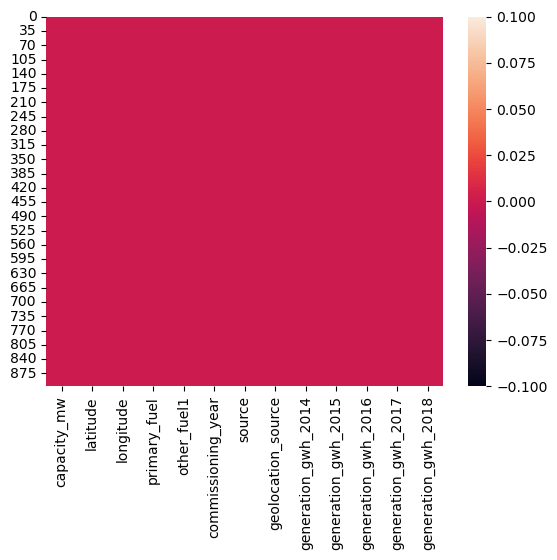

In [26]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull())
plt.show()

Finally we treated all null Values

In [27]:
df.sample(10)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
418,800.0,21.7570,83.4573,Coal,Oil,2018.0,Central Electricity Authority,WRI,211.719417,157.989417,137.834033,0.000000,249.107225
216,10.5,32.2417,76.2787,Hydro,Oil,1996.0,Central Electricity Authority,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
292,155.0,24.3272,81.3293,Coal,Oil,2001.0,Jaypee Ltd jccl),WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
782,600.0,20.0116,79.2036,Coal,Oil,2001.0,Dhariwal Pvt ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
364,2600.0,22.3881,82.6858,Coal,Oil,1991.0,Central Electricity Authority,WRI,18807.000000,19176.000000,19078.000000,19229.000000,18784.000000
795,67.5,26.4875,88.3155,Hydro,Oil,1998.0,Central Electricity Authority,WRI,142.537730,79.629850,0.000000,130.364900,85.042650
511,750.0,24.7754,84.1588,Coal,Oil,2017.0,Central Electricity Authority,WRI,262.167583,0.118300,73.131513,916.480000,2542.900000
128,98.7,23.6756,75.0565,Wind,Oil,2001.0,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
383,101.0,11.0760,79.5700,Gas,Oil,2003.0,Central Electricity Authority,WRI,452.527000,518.844000,335.927000,309.549000,656.532000
893,62.4,30.3033,77.5684,Hydro,Oil,1991.0,Central Electricity Authority,WRI,184.453100,183.000000,204.253600,175.866250,236.491600


## Now lets change the column "commisioning_year" to "age of power plant".

In [28]:
df['Powerplant_age']=2022-df['commissioning_year']
df.drop('commissioning_year',axis=1,inplace=True)
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,11.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0


In [29]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,2344.113460,2378.240537,2432.500522,2522.991508,2597.936619,23.271224
std,590.085456,6.079148,4.815073,2707.888326,2886.972369,2891.384938,2931.985848,3032.038116,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.725000,17.072000,74.388900,753.016275,675.199800,711.907575,804.900275,810.733240,19.000000
50%,59.200000,21.281800,76.719500,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.000000
75%,385.250000,25.176450,79.206100,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,24.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,95.000000


1.The counts of columns are same which means there are no missing values present in the dataset.

2.The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.

3.The median is little greater than the mean in the column latitude which means it is skewed to left.

4.From the difference between maximum and 75% percentile we can understand that there are huge outliers present in most of the columns, we will remove them using appropriate methods before building our model.

5.The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.

## Sepration of categorical and numerical columns.

In [30]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [31]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']


## Visualiazation of Data

### Univariate Analysis Plotting

other_fuel1
Oil             904
Gas               2
Cogeneration      1
Name: count, dtype: int64


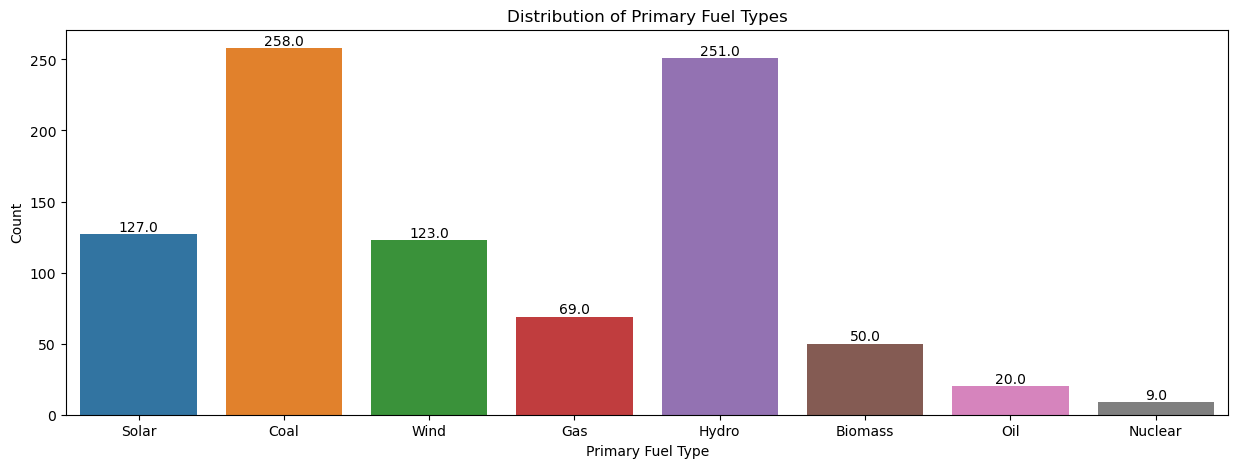

In [32]:
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='primary_fuel')
plt.title('Distribution of Primary Fuel Types')
plt.xlabel('Primary Fuel Type')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()


As per above countplot we can say that coal & hydro are the highly used primary fuels, followed by solar & wind, followed by gas & biomass.

Less used fuels are oil & nuclear.

other_fuel1
Oil             904
Gas               2
Cogeneration      1
Name: count, dtype: int64


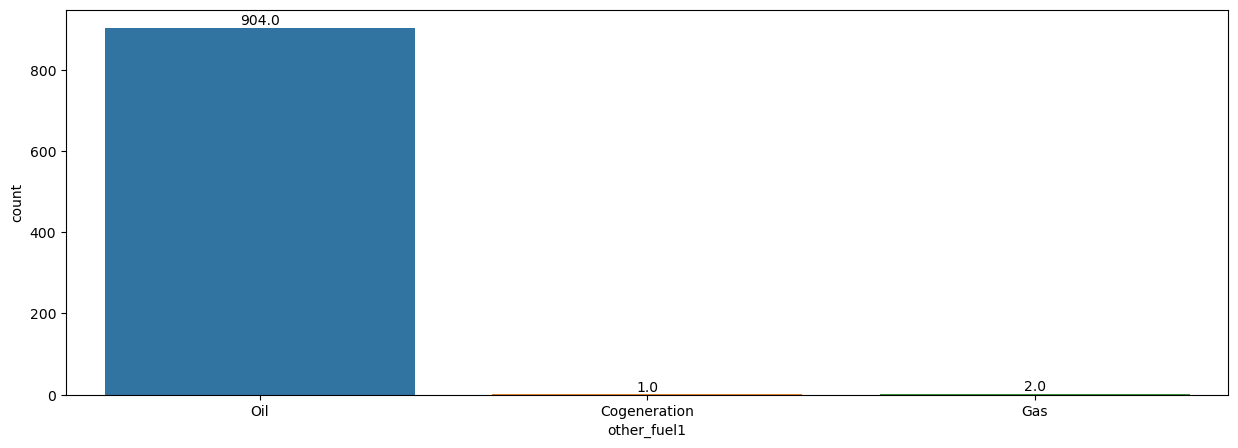

In [33]:
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='other_fuel1')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()


As per above countplot we can see that oil is the fuel used at great number.

Cogeneration and gas are not at all used in any cases

source
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: count, Length: 191, dtype: int64


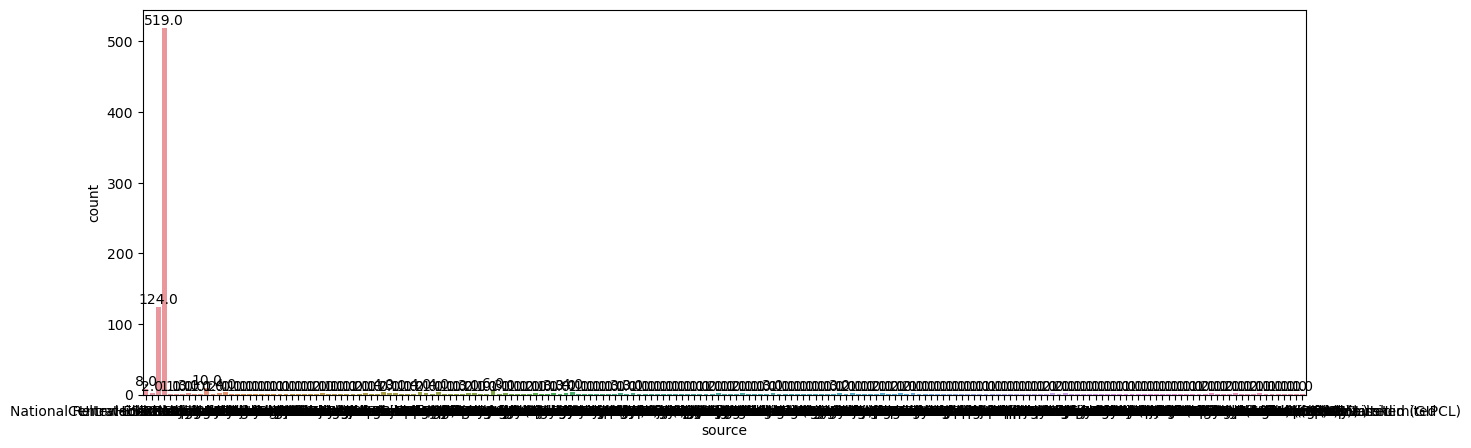

In [34]:
print(df["source"].value_counts())
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=df, x='source')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.show()


As per above plot we can see that source of fuel at "Central Electricity Authority " is high.

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: count, dtype: int64


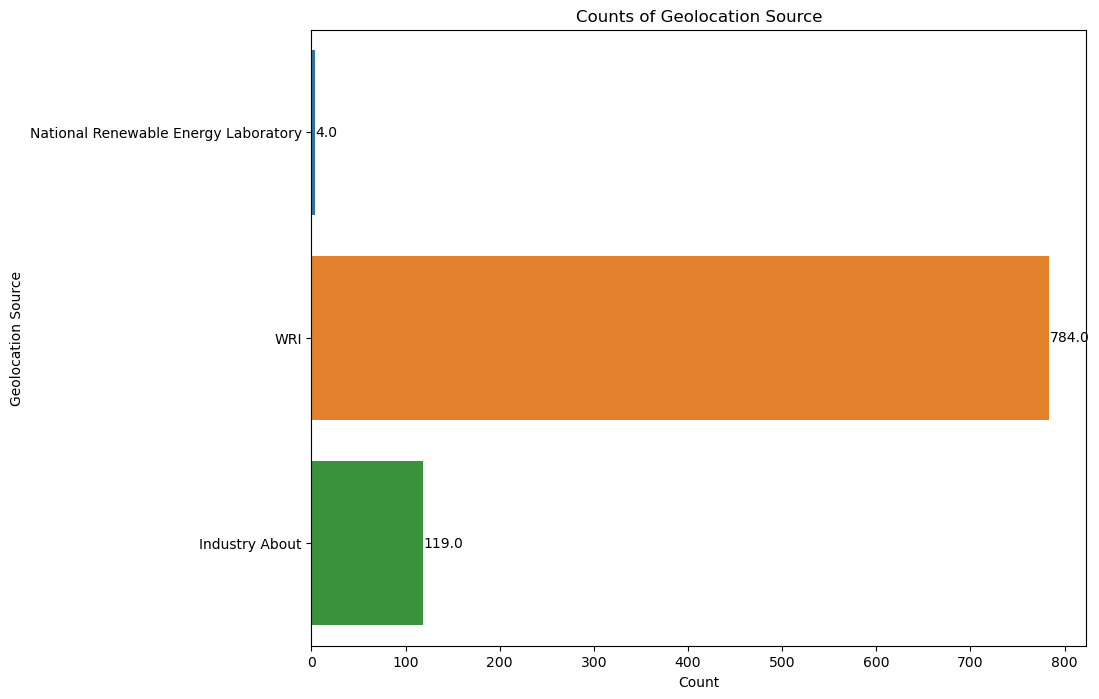

In [35]:
print(df["geolocation_source"].value_counts())

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, y='geolocation_source')
plt.title('Counts of Geolocation Source')
plt.xlabel('Count')
plt.ylabel('Geolocation Source')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='left', va='center')

plt.show()


As per above pie chart we can se that the count of WRI is high 784 in case of "geolocation_source"

### Bivarient plotting

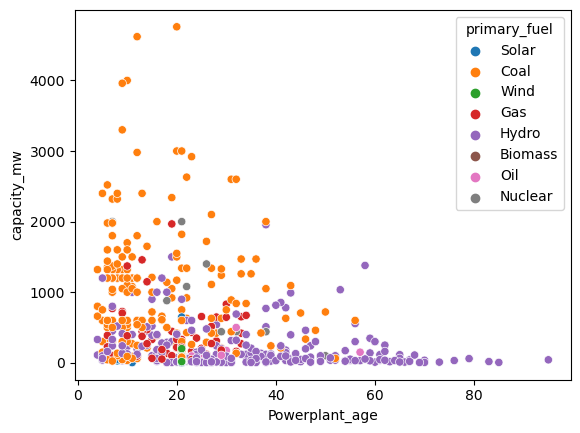

In [36]:
sns.scatterplot(x = "Powerplant_age", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

we can see that coal, hydor and gas fuels are used higher numbers.


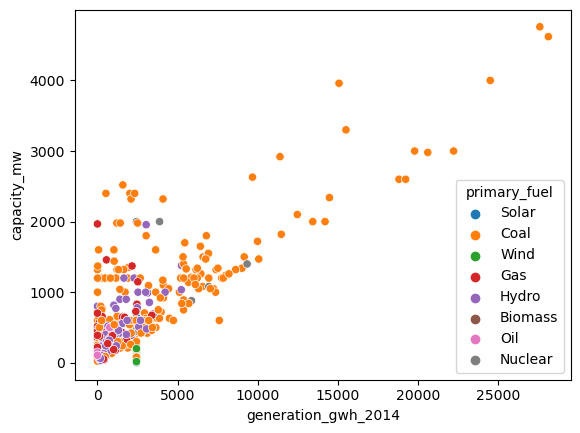

In [37]:
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

We can see the linear relationship between the feature and the label. Here the electricity generation reported for the year 2014 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

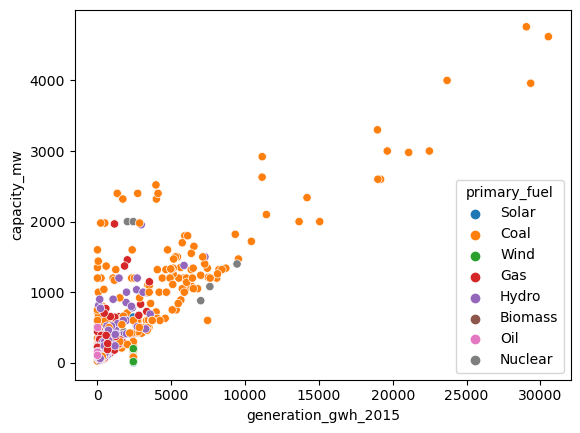

In [38]:
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

We can noticed the linear relationship between the feature and the label. Here the electricity generation reported for the year 2015 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately

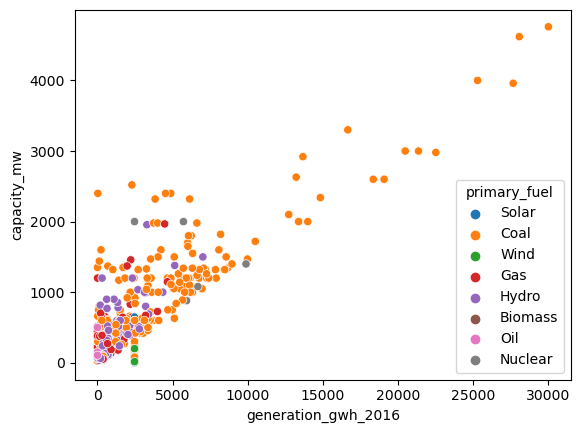

In [39]:
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

Same as in case of year 2014 & 2015, generation_gwh increases then capacity also increases.

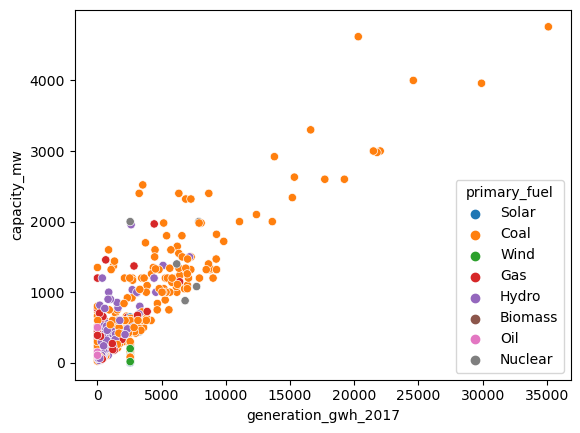

In [40]:
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

Capacity of the plant is increasing moderately with respect to the generation of year 2017

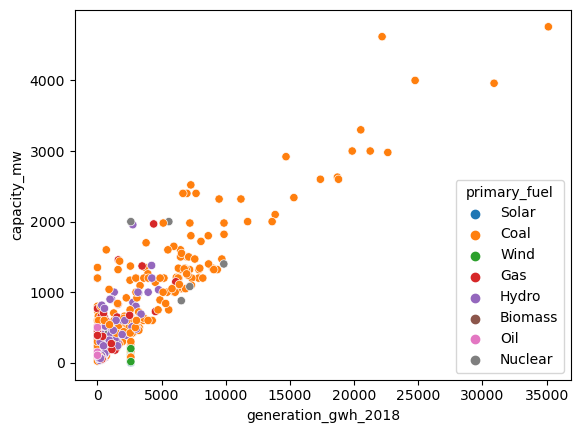

In [41]:
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

Capacity of the plant is increasing moderately with respect to the generation in year 2018

### Bar Plot

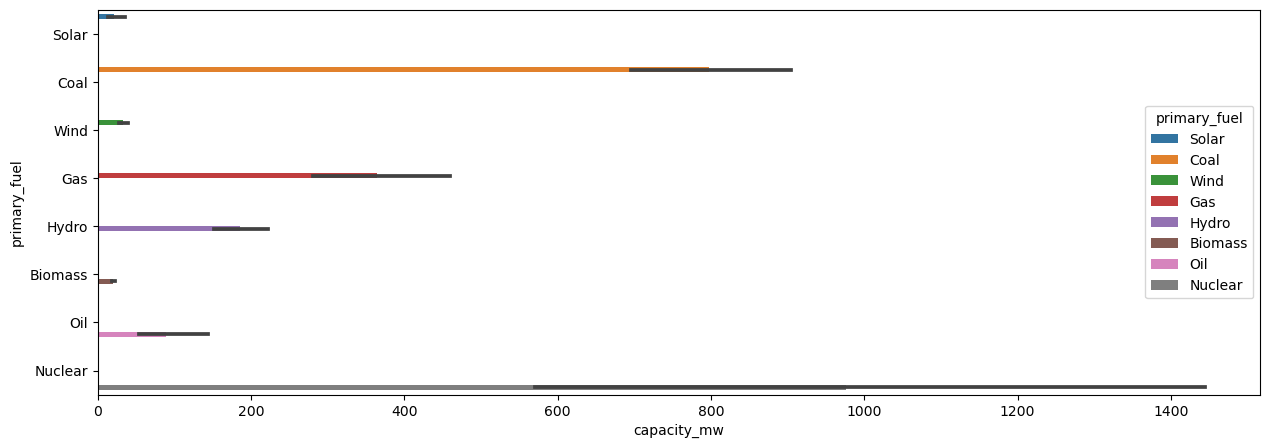

In [42]:
#Lets check the relation between primary_fuel and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "capacity_mw", y = "primary_fuel", data = df,hue='primary_fuel')
plt.show()

As per above bar plot we can see that coal has high capacity, follower by gas and hydro.

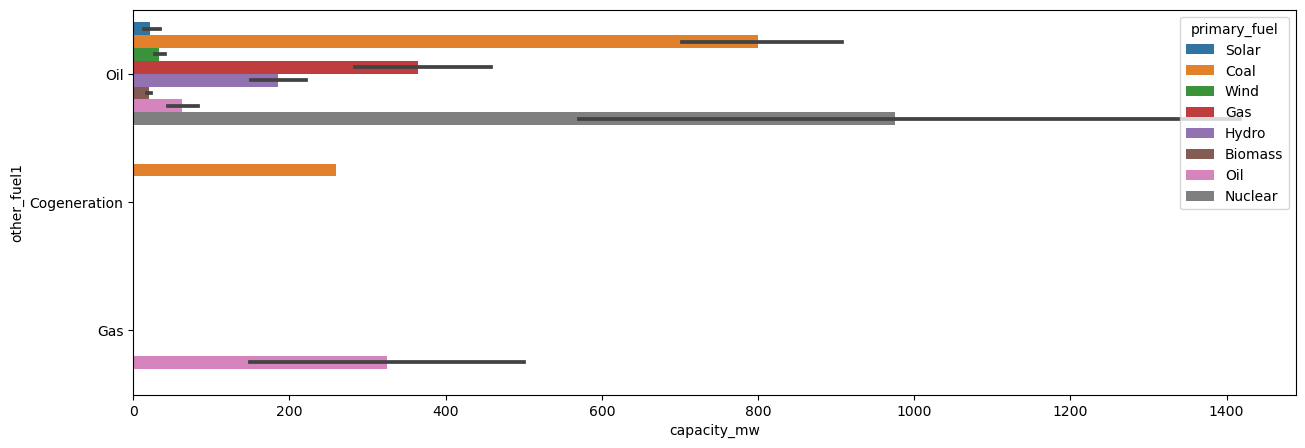

In [43]:
#Lets check the relation between other_fuel1 and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "capacity_mw", y = "other_fuel1", data = df,hue='primary_fuel')
plt.show()

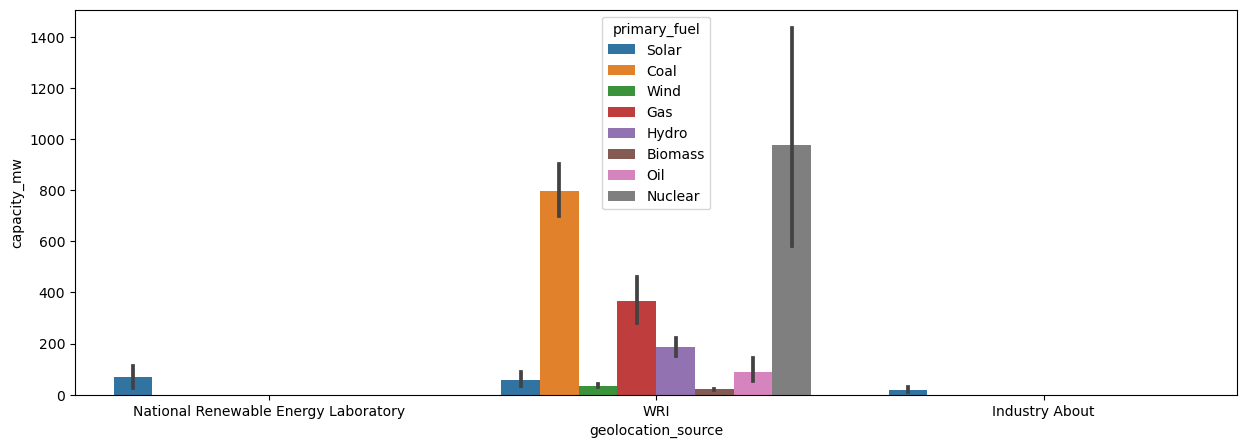

In [44]:
#Lets check the relation between geolocation_source and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df,hue='primary_fuel')
plt.show()

The capacity of geolocation source "WRI" is maximum which has capacity more than 350 mega watts. The geolacation source "Industry About" has less capacity. In WRI all sources of power is used.

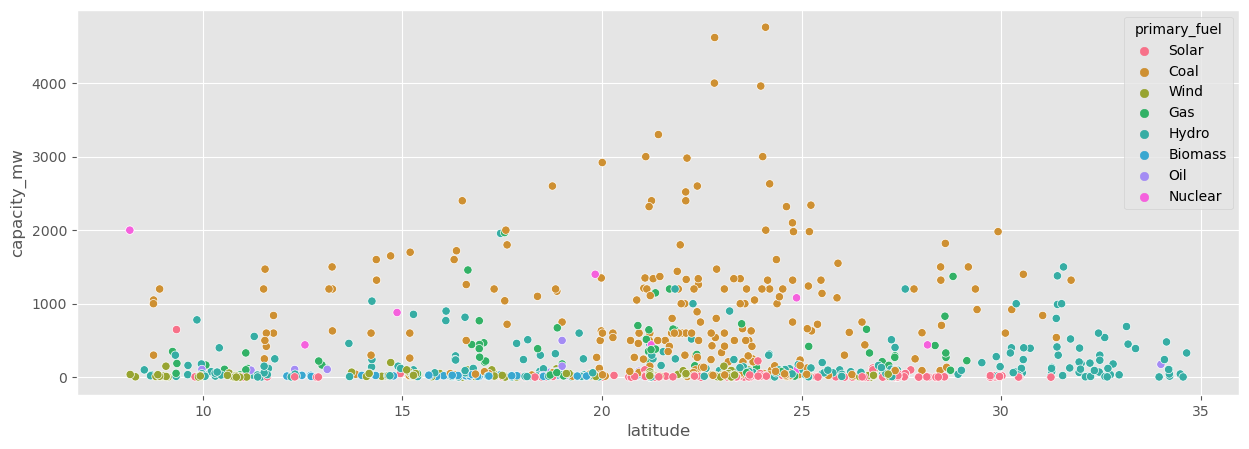

In [45]:
# Let's check how the capacity is reated to latitude of the power plant.
plt.figure(figsize=[15, 5])
plt.style.use('ggplot')
sns.scatterplot(data=df, x='latitude', y='capacity_mw', hue='primary_fuel')
plt.show()


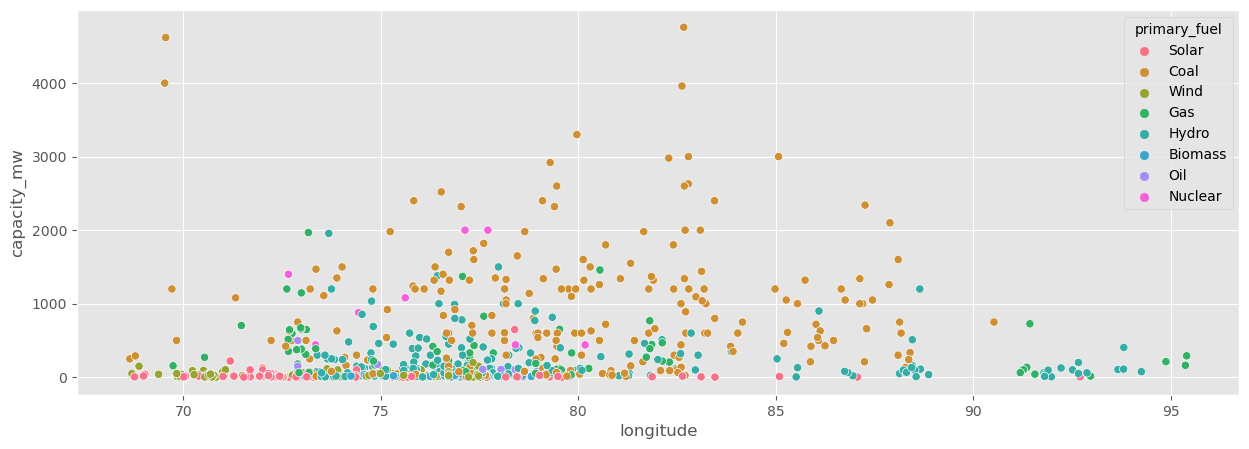

In [46]:
# Let's check how the capacity is reated to longitude of the power plant.
plt.figure(figsize=[15, 5])
plt.style.use('ggplot')
sns.scatterplot(data=df, x='longitude', y='capacity_mw', hue='primary_fuel')
plt.show()

### Line Plot

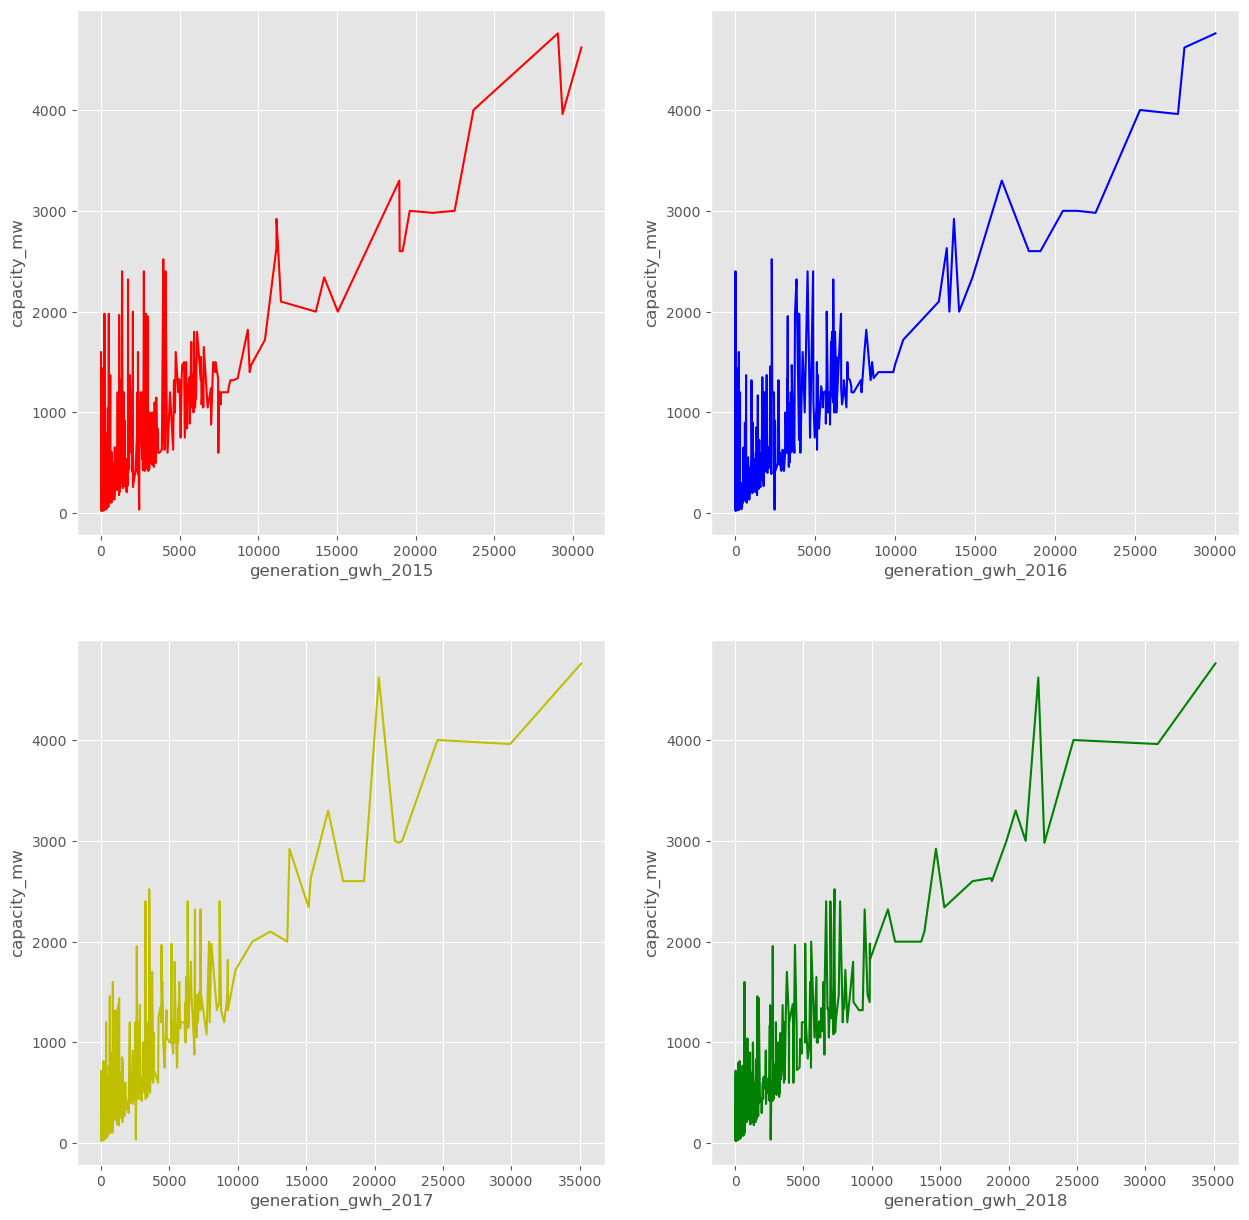

In [47]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

# Checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="r")

# Checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="b")

# Checking attrition level in Monthlyrate
sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="y")

# Checking attrition level in Monthlyincome
sns.lineplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="g")
plt.show()

As per above line plots we can see that when generation is increasing capacity of the plant is also increasing in the year 2015,2016,2017,2018.

There is a positive linear relationship between the capacity and the electricity generation.

### Distribution plot

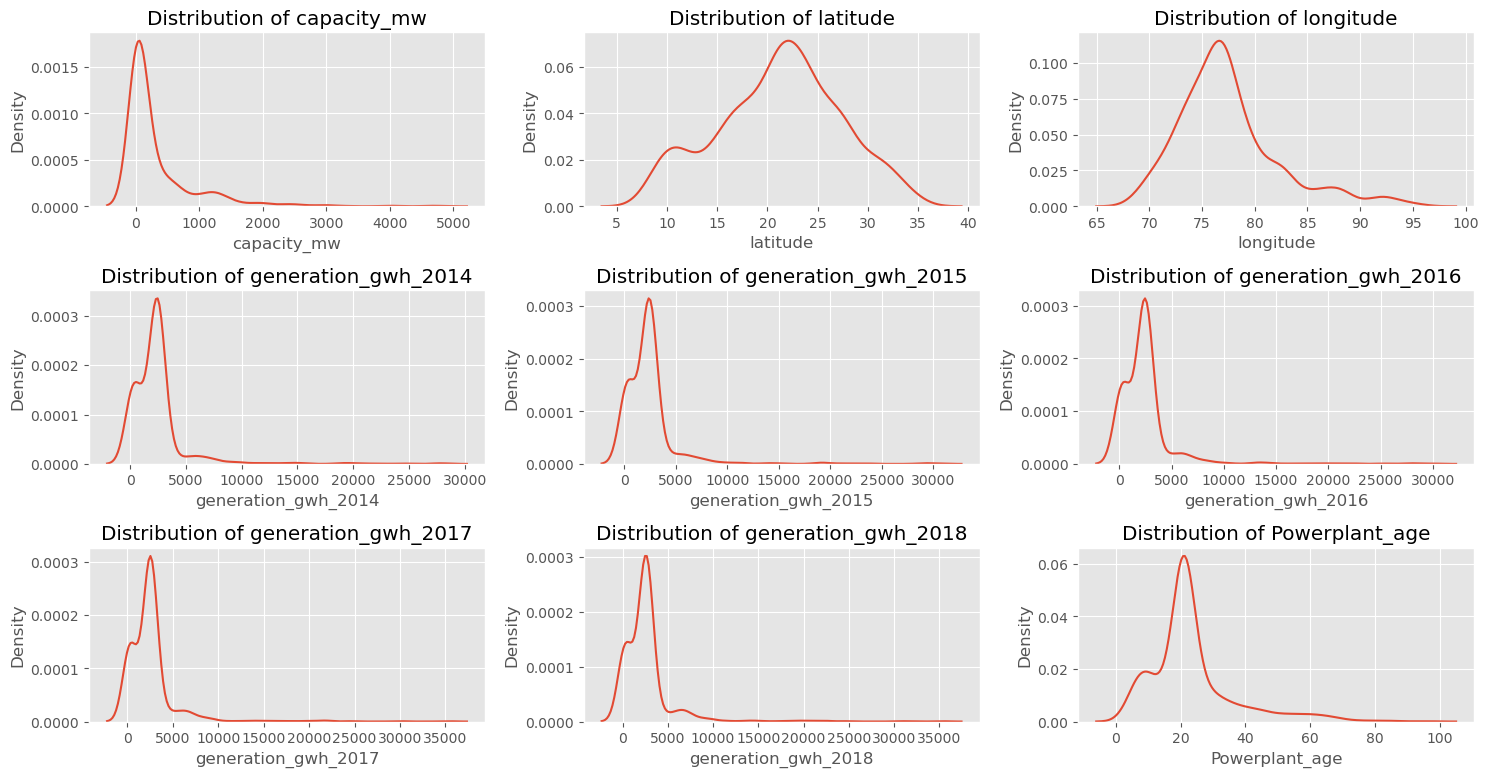

In [48]:
plt.figure(figsize=(15, 10))

# Select only numeric columns for plotting
numeric_columns = df.select_dtypes(include='number').columns

for column in numeric_columns:
    plt.subplot(4, 3, numeric_columns.get_loc(column) + 1) 
    sns.distplot(df[column], hist=False)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


### Pairplot

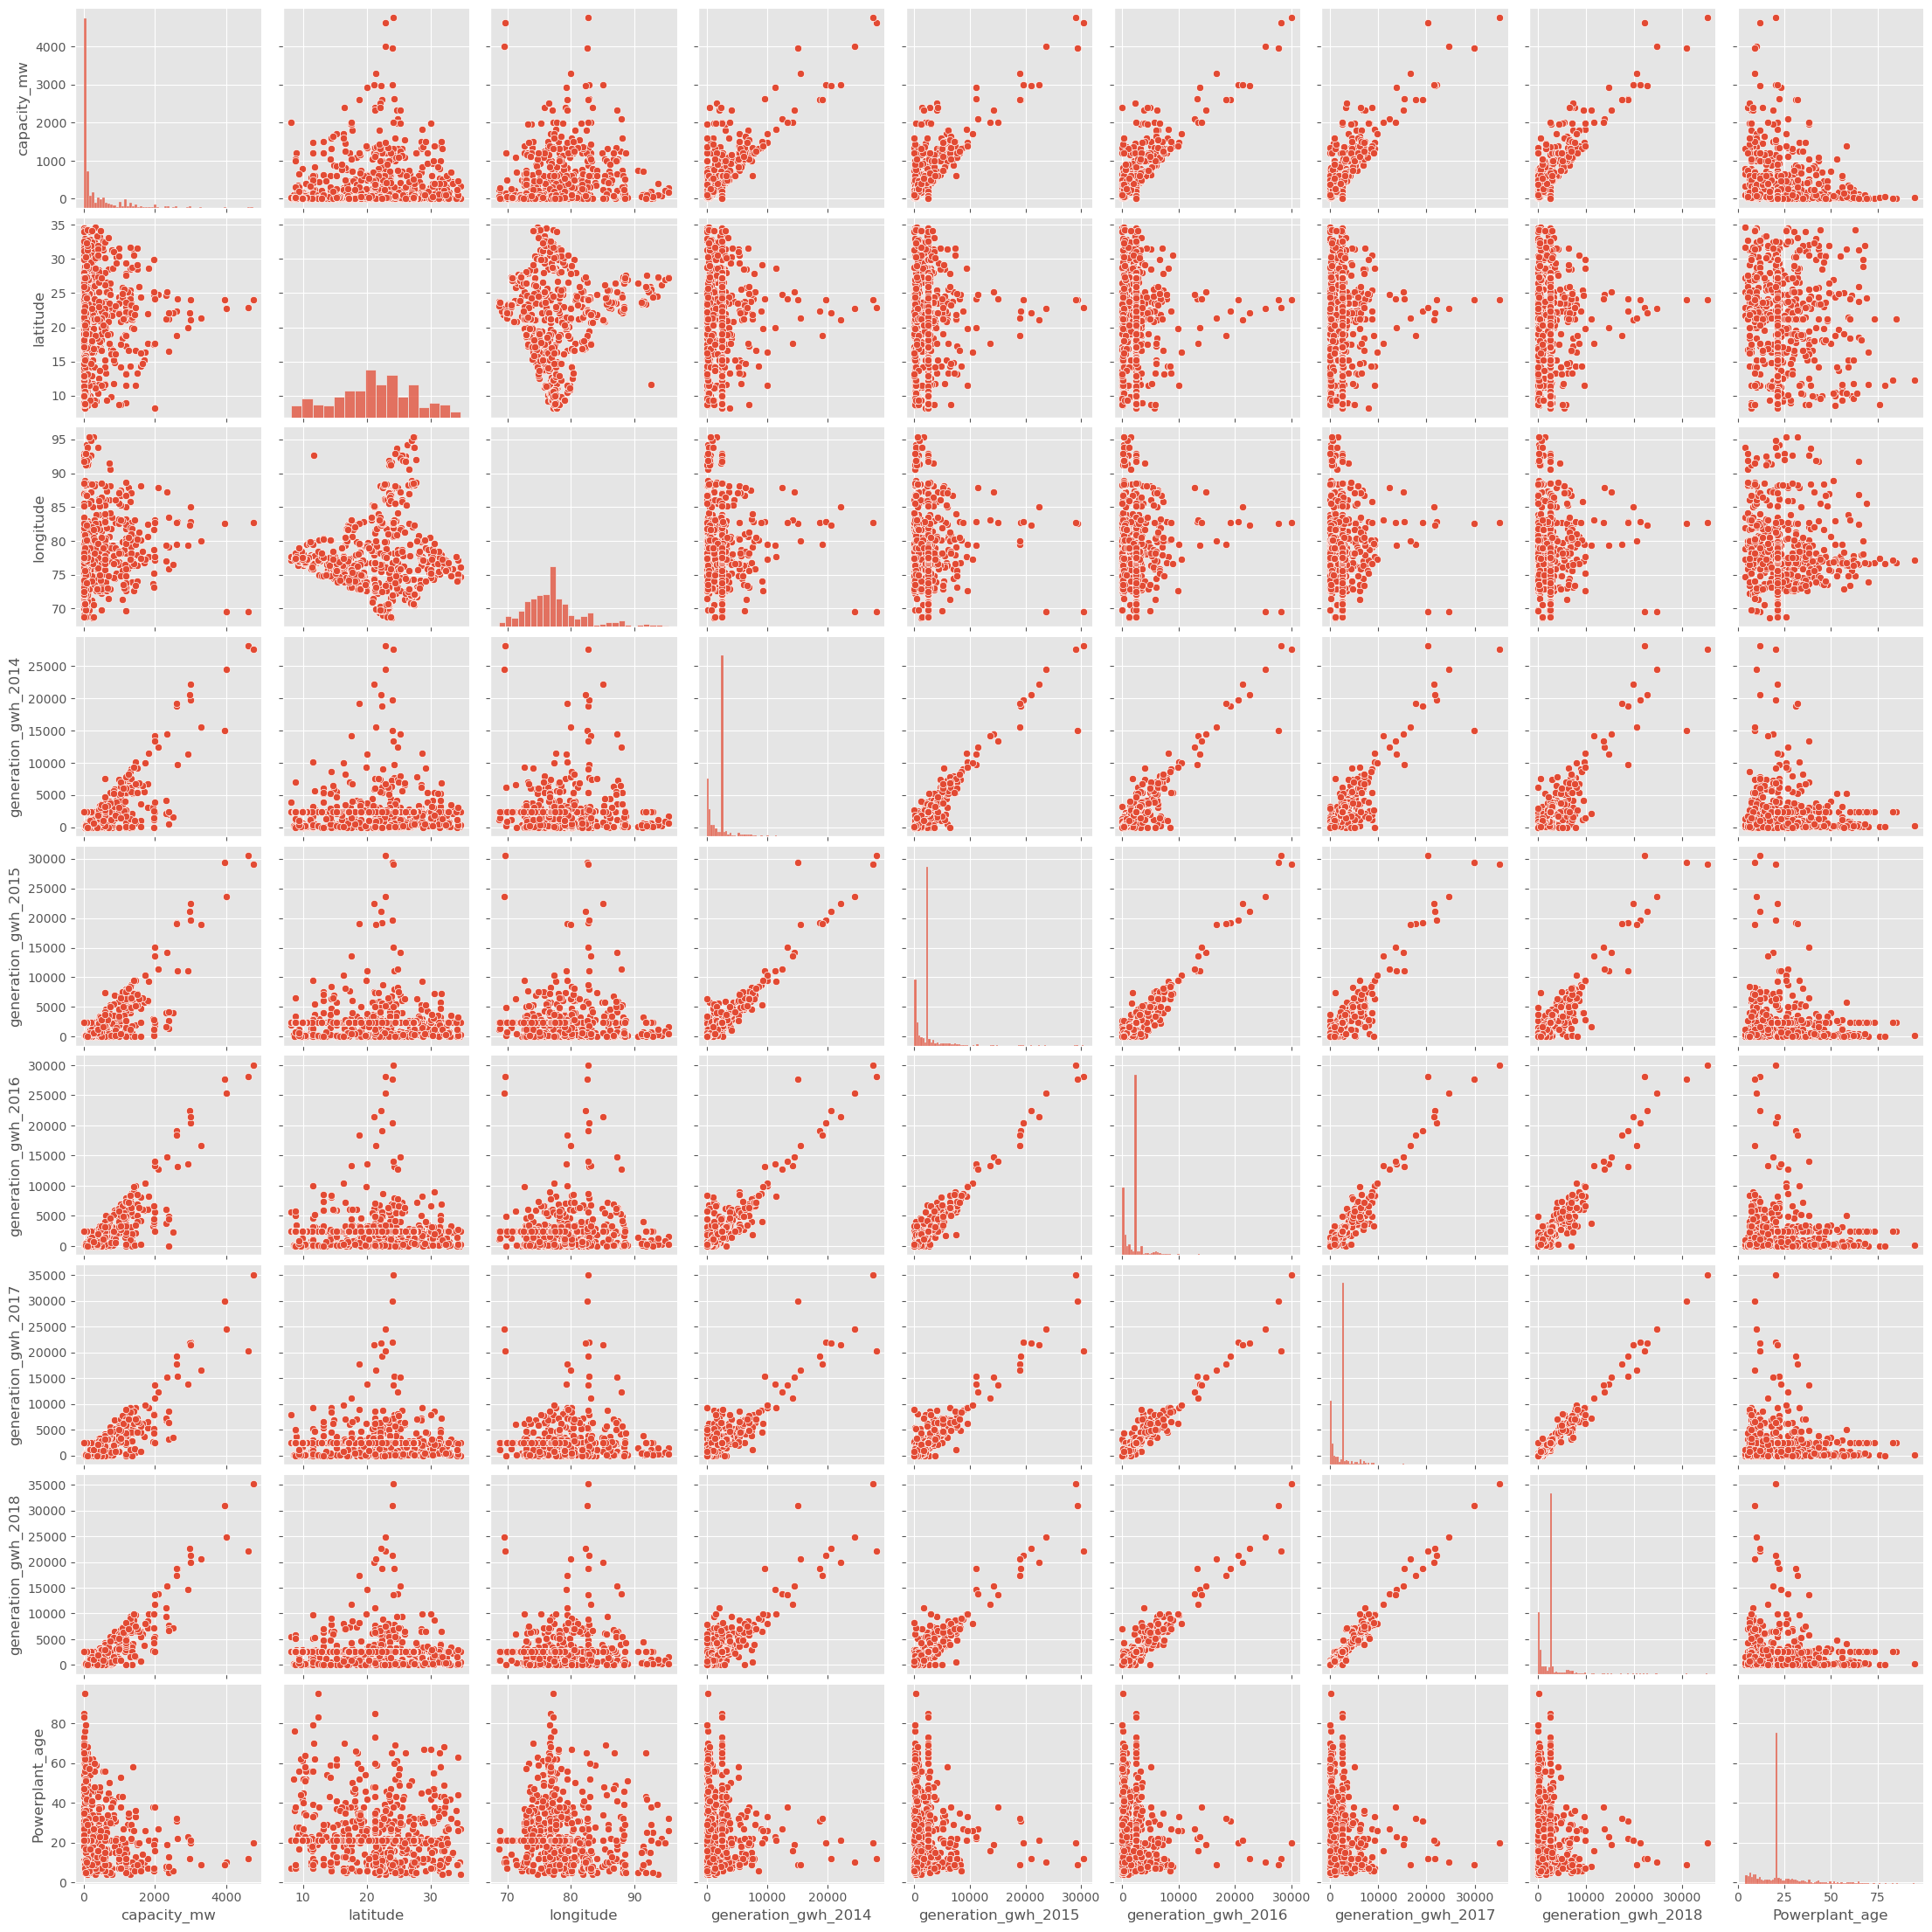

In [49]:
# Checking the pairwise relation between the features.
sns.pairplot(df)
plt.show()

From the above pairplot , we conclude that there are linear relationship between few variable, let us check multicollinearity to avoid later problem

## Checking for outliers:

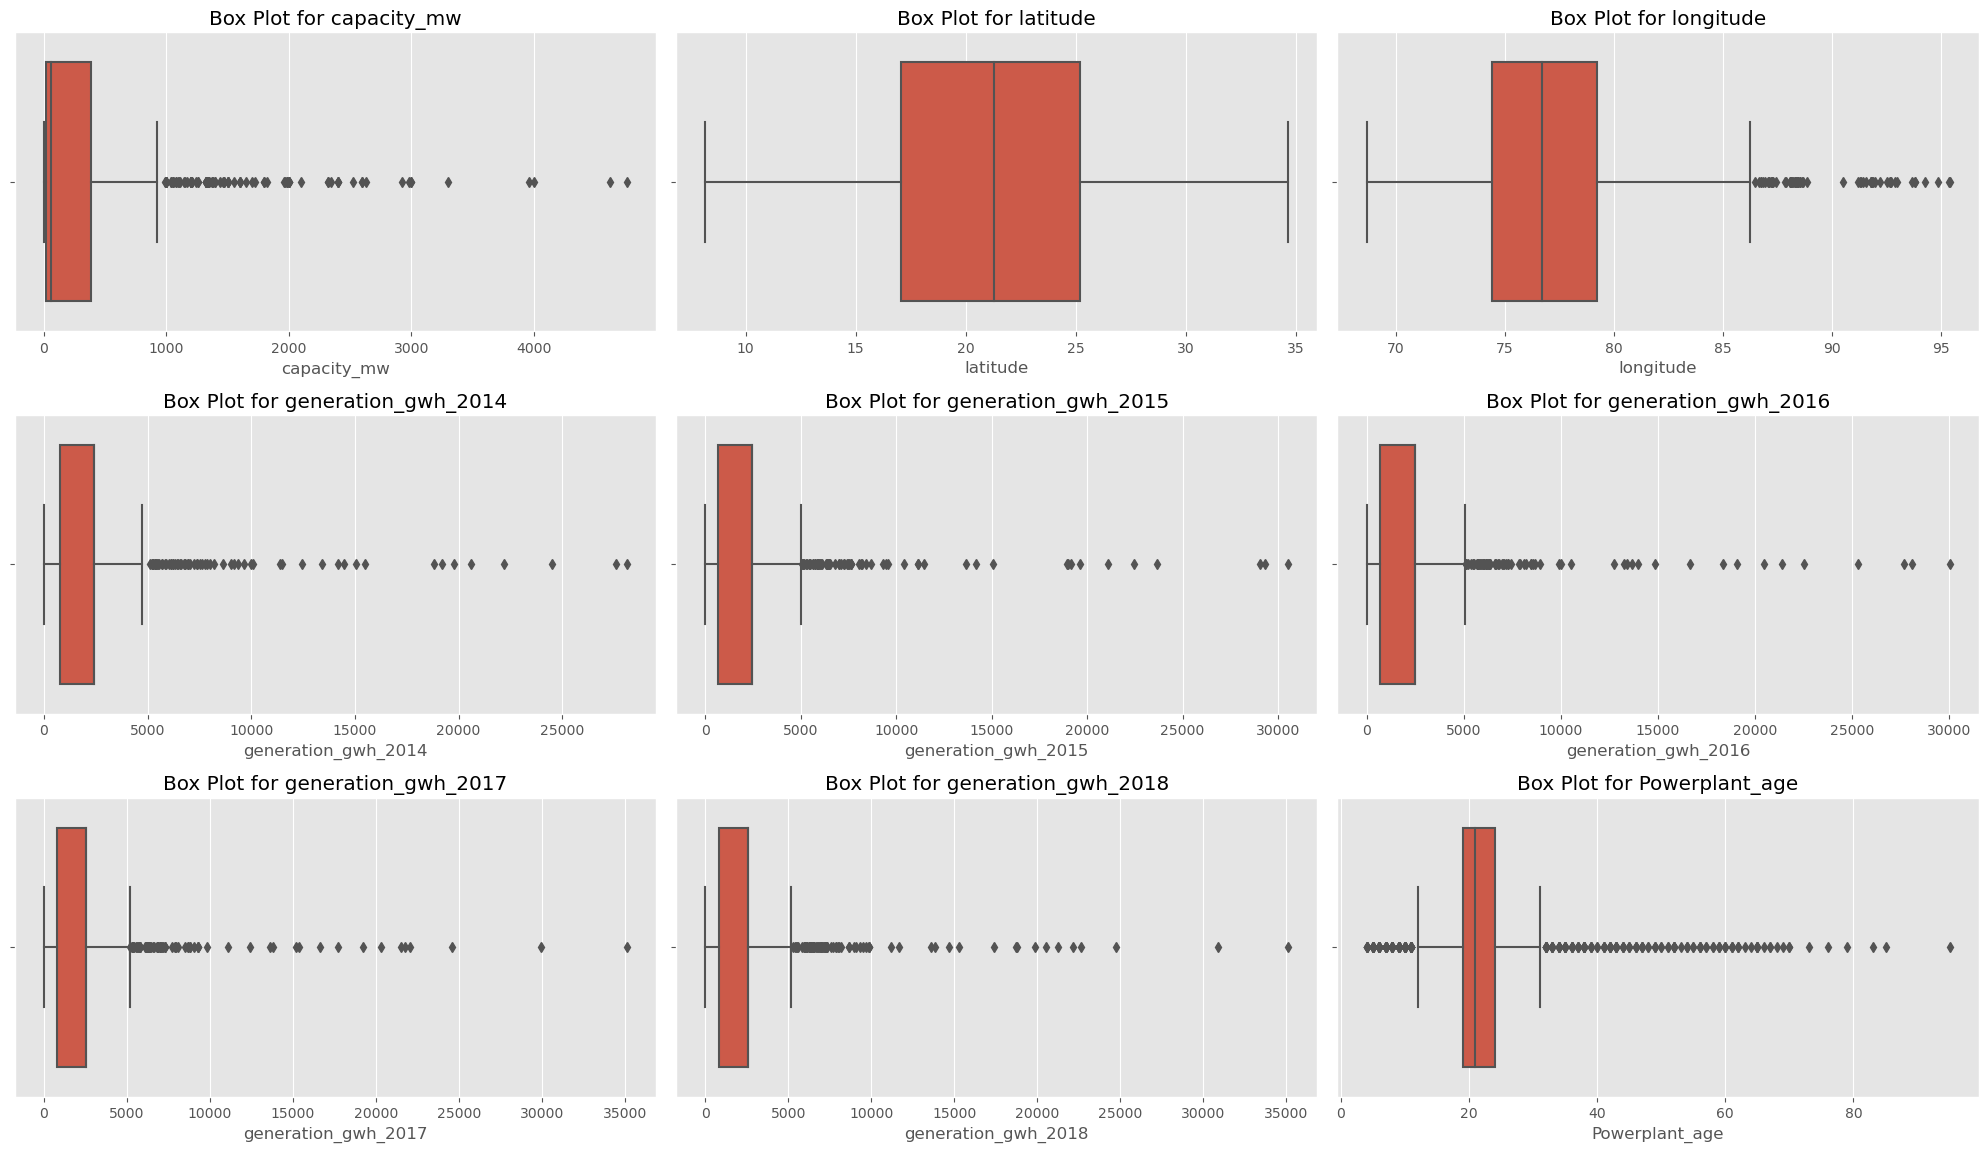

In [50]:

numeric_columns = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(20, 15)) 

for column in numeric_columns:
    plt.subplot(4, 3, numeric_columns.get_loc(column) + 1) 
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()


all features contained outliers except latitude column.

## Removing outliers using Zscore method

In [51]:
from scipy import stats

threshold = 3

# Columns containing outliers
columns = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']]

z = np.abs(stats.zscore(columns))
outlier_indices = np.where(z > threshold)
new_df = df.drop(index=outlier_indices[0])


In [52]:
new_df["capacity_mw"]

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 854, dtype: float64

In [53]:
df.shape

(907, 13)

In [54]:
new_df.shape

(854, 13)

In [55]:
original_rows = df.shape[0]
new_rows = new_df.shape[0]

data_loss_percentage = ((original_rows - new_rows) / original_rows) * 100

# Print the results
print(f"Original data rows: {original_rows}")
print(f"Rows after removing outliers: {new_rows}")
print(f"Data loss percentage: {data_loss_percentage:.2f}%")


Original data rows: 907
Rows after removing outliers: 854
Data loss percentage: 5.84%


After using Z-Score method for removing outliers, we are losing 5.84% of data from our dataset.

## Encoding

In [56]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


In [57]:
new_df["capacity_mw"]

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 854, dtype: float64

## Checkling Skewness  

In [58]:
new_df.skew()

capacity_mw             2.161708
latitude               -0.115988
longitude               0.942699
primary_fuel            0.419446
other_fuel1           -19.844215
source                  1.739843
geolocation_source     -2.072421
generation_gwh_2014     1.529398
generation_gwh_2015     1.390368
generation_gwh_2016     1.381652
generation_gwh_2017     1.280600
generation_gwh_2018     1.418935
Powerplant_age          1.275555
dtype: float64

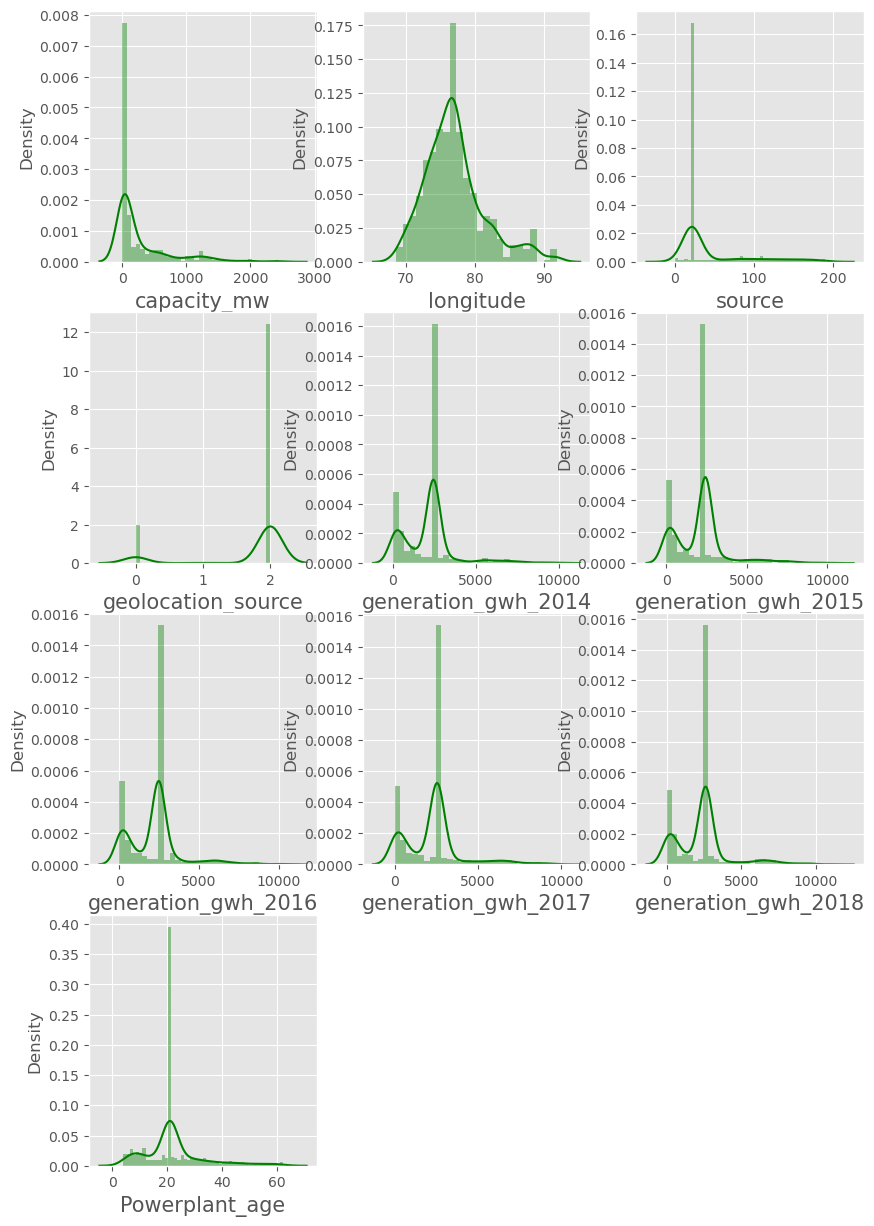

In [59]:
feature=new_df[["capacity_mw",'longitude','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']]

#Visualizing

plt.figure(figsize = (10,15))
plotnumber = 1

for column in feature:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feature[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

We can see high skewness is present in all the columns.


## Correlation using Heatmap


In [60]:
new_df.corr()


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.041830,0.256808,-0.400430,-0.001051,-0.275712,0.234275,0.354727,0.404036,0.476635,0.535100,0.567374,-0.238370
latitude,0.041830,1.000000,-0.015211,0.000115,0.036829,0.070663,-0.204028,0.011775,0.005180,-0.003226,0.020771,0.011108,-0.098819
longitude,0.256808,-0.015211,1.000000,-0.383555,0.029258,-0.236233,0.264133,-0.104405,-0.074378,-0.033324,-0.019037,-0.012766,-0.080037
primary_fuel,-0.400430,0.000115,-0.383555,1.000000,0.006260,0.040213,-0.479057,-0.008615,-0.025061,-0.041351,-0.057391,-0.063945,0.074081
other_fuel1,-0.001051,0.036829,0.029258,0.006260,1.000000,0.028358,-0.022740,0.031251,0.038726,0.047436,0.049494,0.054723,-0.058009
source,-0.275712,0.070663,-0.236233,0.040213,0.028358,1.000000,-0.498249,0.110366,0.103734,0.095918,0.087911,0.080582,-0.075219
geolocation_source,0.234275,-0.204028,0.264133,-0.479057,-0.022740,-0.498249,1.000000,-0.088501,-0.083183,-0.076916,-0.070495,-0.064618,0.051527
generation_gwh_2014,0.354727,0.011775,-0.104405,-0.008615,0.031251,0.110366,-0.088501,1.000000,0.915292,0.830158,0.781078,0.755210,-0.068101
generation_gwh_2015,0.404036,0.005180,-0.074378,-0.025061,0.038726,0.103734,-0.083183,0.915292,1.000000,0.921122,0.843400,0.821278,-0.134082
generation_gwh_2016,0.476635,-0.003226,-0.033324,-0.041351,0.047436,0.095918,-0.076916,0.830158,0.921122,1.000000,0.931551,0.901800,-0.198926


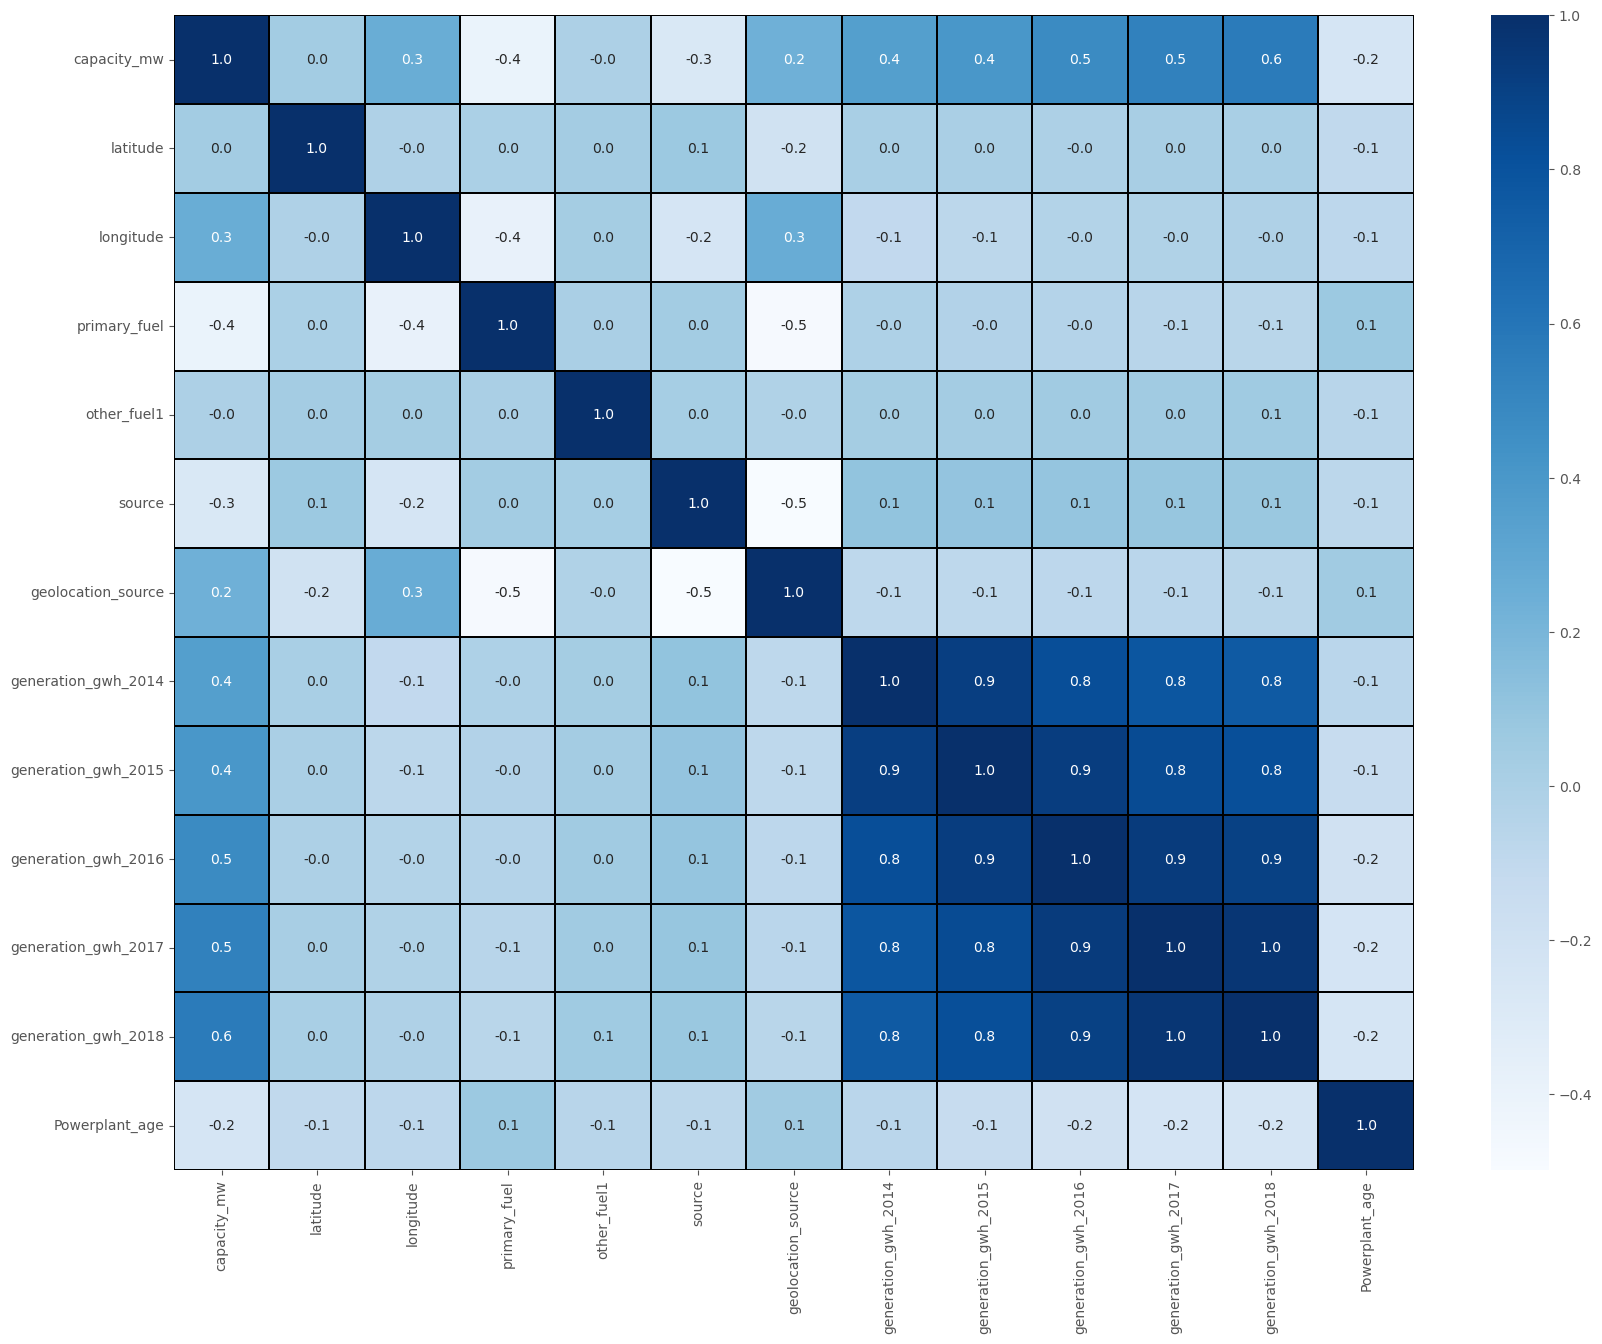

In [61]:
# Visualizing the correlation matrix by plotting a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(new_df.corr(), linewidths=0.1, fmt=".1f", linecolor="black", annot=True, cmap="Blues")
plt.yticks(rotation=0)
plt.show()

The target variable "capacity_mw" is highly & positively correlated with the features columns "generation_gwh_2017, generation_gwh_2016,generation_gwh_2015, generation_gwh_2014, generation_gwh_2018".

The target variable is negatively correlated with the features columns "primary_fuel, source and Power_plant_age".

The feature columns "other_fuel1" and "latitude" have no relation with the target variable, so we can drop them.

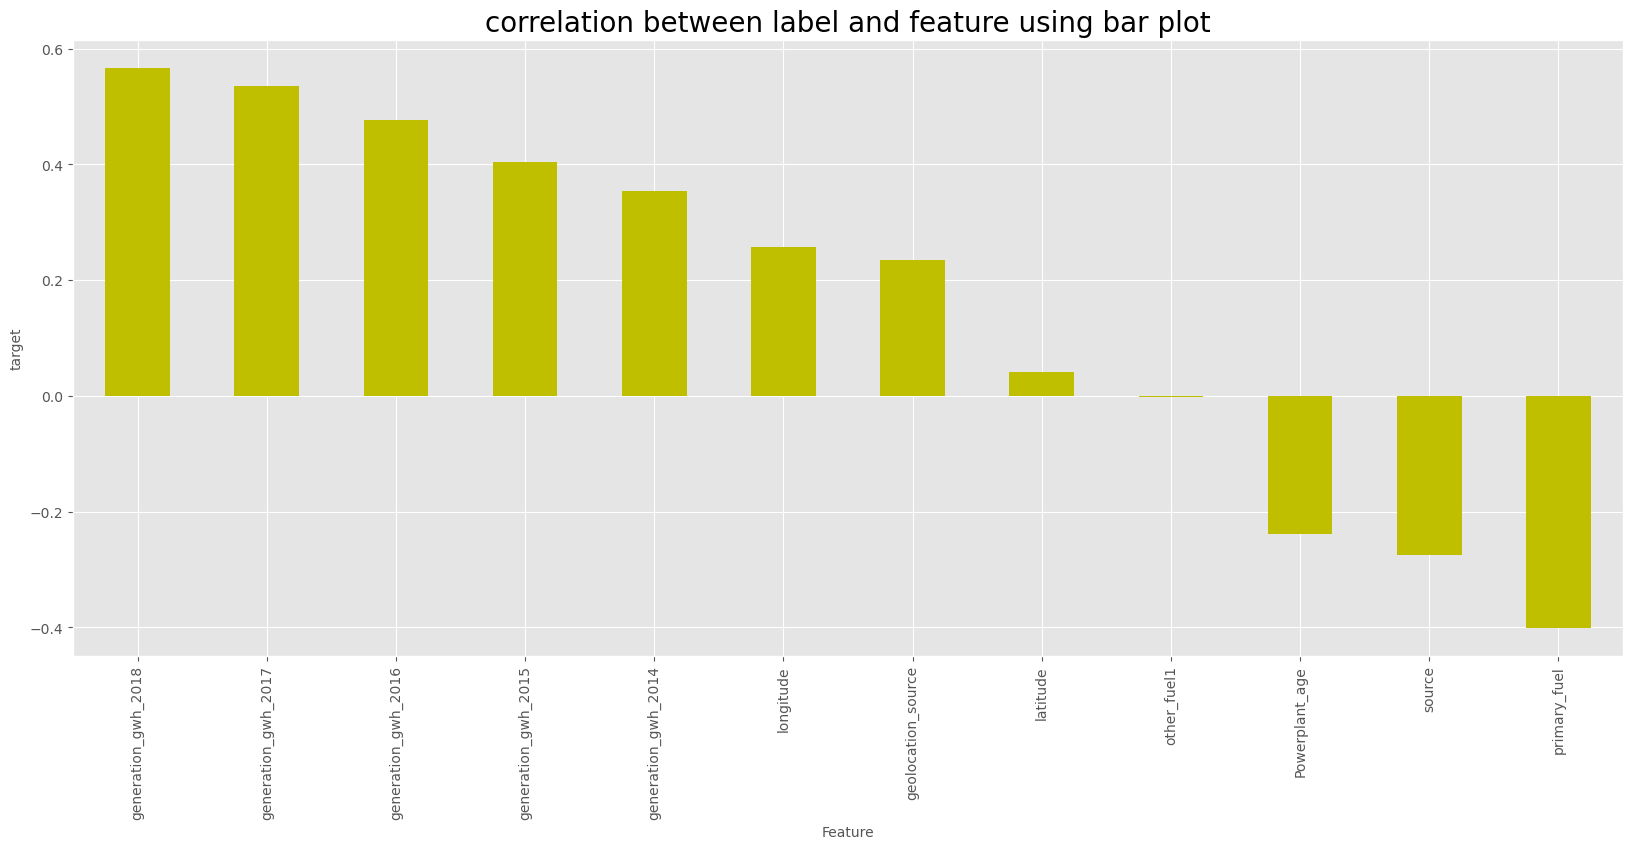

In [62]:
plt.figure(figsize=(20,8))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [63]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [64]:
new_df.sample(10)

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
410,1.00,79.5898,6,138,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
813,500.00,72.8983,5,22,2,770.180000,15.000000,0.000000,0.000000,0.000000,32.0
258,156.10,69.7399,2,22,2,206.547000,136.064400,23.374550,1.878000,23.496000,21.0
241,3.00,72.3896,6,162,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
269,49.00,75.7620,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
192,125.00,76.7195,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
259,351.43,72.6613,2,22,2,0.000000,0.000000,222.817300,185.639000,340.821000,10.0
849,1550.00,81.3274,1,22,2,6925.000000,6353.000000,6335.000000,6337.000000,6552.000000,20.0
43,180.00,76.1418,3,22,2,792.686650,741.862050,665.983350,638.521350,364.836650,42.0
902,1600.00,77.3568,1,22,2,71.736667,0.994875,233.596650,865.400000,686.500000,6.0


In [65]:
#Let us save one Data Frame for classification problem
Primary_Fuel_df=new_df

In [66]:
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']

In [67]:
y.value_counts()

capacity_mw
5.00       37
10.00      21
600.00     20
15.00      19
1200.00    19
           ..
119.80      1
21.84       1
195.00      1
645.00      1
106.60      1
Name: count, Length: 334, dtype: int64

## Standard Scalarization for Feature Scaling:

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.881363,1.179040,1.401565,-1.039478,0.217817,0.204728,0.189303,0.173501,0.159035,-1.007814
1,-0.562660,-0.972456,2.827272,0.406311,0.217817,0.204728,0.189303,0.173501,0.159035,-0.109220
2,-1.782175,1.609339,-0.528624,0.406311,0.217817,0.204728,0.189303,0.173501,0.159035,-0.109220
3,3.339005,-0.542157,-0.506690,0.406311,-0.953489,-0.802993,-0.791453,-0.950930,-0.968925,-0.378798
4,1.254128,-0.972456,-0.506690,0.406311,0.607638,2.423168,2.529740,1.867216,2.831432,-1.367251
...,...,...,...,...,...,...,...,...,...,...
849,0.077353,-0.972456,-0.506690,0.406311,-1.306070,-1.338978,-1.195928,-0.830592,-0.934501,-1.457111
850,0.265691,1.179040,0.699678,-2.485267,0.217817,0.204728,0.189303,0.173501,0.159035,-0.109220
851,-0.336240,1.609339,-0.528624,0.406311,0.217817,0.204728,0.189303,0.173501,0.159035,-0.109220
852,-0.763273,-0.972456,0.304867,0.406311,0.217817,0.204728,0.189303,0.173501,0.159035,-0.109220


## Checking VIF(Variance Inflation Factor) values

let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns

In [69]:
#importing VIF from statsmodels:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.271305,longitude
1,1.608901,primary_fuel
2,1.508129,source
3,1.867848,geolocation_source
4,6.545104,generation_gwh_2014
5,13.214985,generation_gwh_2015
6,15.027889,generation_gwh_2016
7,19.330279,generation_gwh_2017
8,13.396670,generation_gwh_2018
9,1.115530,Powerplant_age


We can observe that all the columns have VIF less than 10 except column "generation_gwh_2016" is slightly above that, which we can ignore

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)

In [71]:
RFR = RandomForestRegressor(criterion='poisson', warm_start=True)
RFR.fit(x_train, y_train)

pred_RFR = RFR.predict(x_test)

r2 = r2_score(y_test, pred_RFR)
mae = mean_absolute_error(y_test, pred_RFR)
mse = mean_squared_error(y_test, pred_RFR)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, pred_RFR)
evs = explained_variance_score(y_test, pred_RFR)
median_err = median_absolute_error(y_test, pred_RFR)
max_err = max_error(y_test, pred_RFR)

print('R-squared (R2):', r2)
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Squared Logarithmic Error (MSLE):', msle)
print('Explained Variance Score (EVS):', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared (R2): 0.8471262737368901
Mean Absolute Error (MAE): 91.46622110826891
Mean Squared Error (MSE): 31487.643343066564
Root Mean Squared Error (RMSE): 177.44757914118344
Mean Squared Logarithmic Error (MSLE): 0.992452197243303
Explained Variance Score (EVS): 0.8471913769474694
Median Absolute Error: 31.527500000000003
Max Error: 967.58124


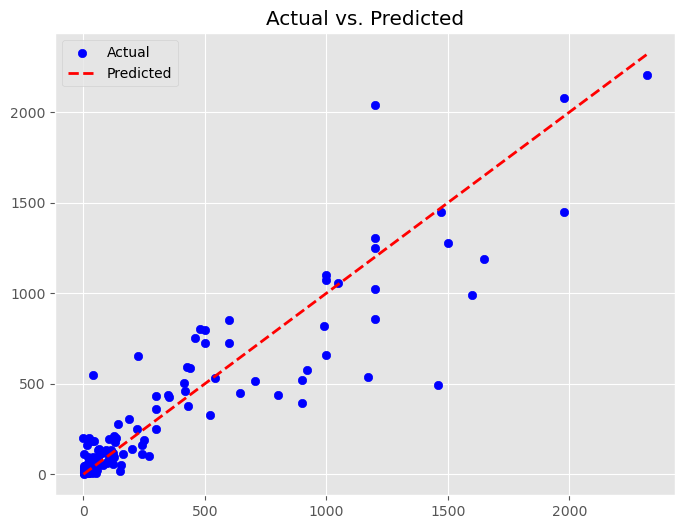

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_RFR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


## LinearRegression

In [73]:
LR= LinearRegression()
LR.fit(x_train, y_train)
pred_LR=LR.predict(x_test)

r2 = LR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_LR)
mse = mean_squared_error(y_test, pred_LR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_LR)
evs = explained_variance_score(y_test, pred_LR)
median_err = median_absolute_error(y_test, pred_LR)
max_err = max_error(y_test, pred_LR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.5557436630321171
Mean Absolute Error: 210.17960983282313
Mean Squared Error: 78543.76543682002
Root Mean Squared Error: 280.25660641066077
Mean Absolute Percentage Error: 4908606297330941.0
Explained Variance Score: 0.6186852515180625
Median Absolute Error: 141.4395023611923
Max Error: 1049.2281682819087


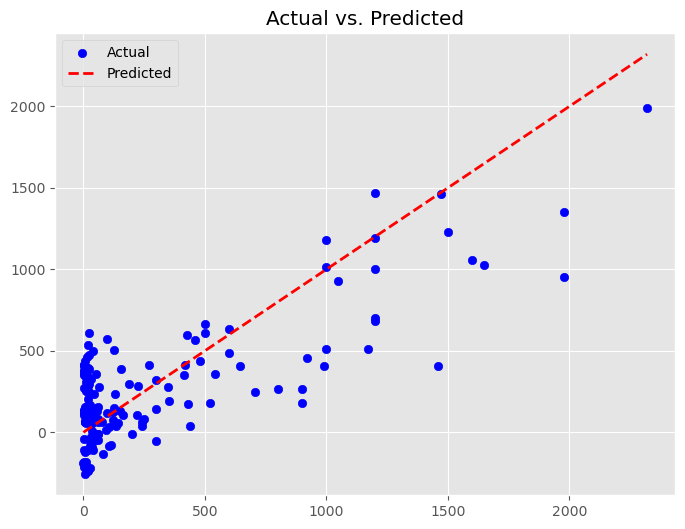

In [74]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_LR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()


## KNeighborsRegressor

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] 
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [76]:
KNN = KNeighborsRegressor(n_neighbors=7,p=1,weights="distance")
KNN.fit(x_train, y_train)
pred_KNN = KNN.predict(x_test)

r2 = KNN.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_KNN)
mse = mean_squared_error(y_test, pred_KNN)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_KNN)
msle = mean_squared_log_error(y_test, pred_KNN)
evs = explained_variance_score(y_test, pred_KNN)
median_err = median_absolute_error(y_test, pred_KNN)
max_err = max_error(y_test, pred_KNN)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.9998818075060426
Mean Absolute Error: 107.07662460282026
Mean Squared Error: 45131.29937460147
Root Mean Squared Error: 212.4412845343425
Mean Absolute Percentage Error: 462761105767851.1
Mean Squared Logarithmic Error: 1.0373051508984226
Explained Variance Score: 0.7913452268332264
Median Absolute Error: 24.238503224632822
Max Error: 1130.104136902166


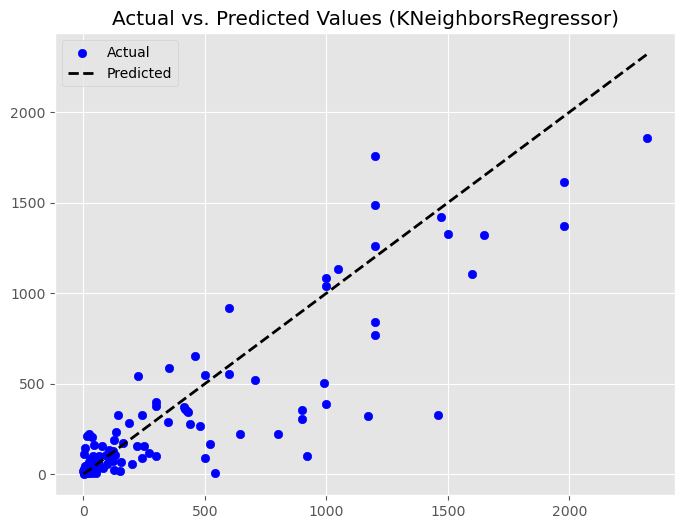

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_KNN, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values (KNeighborsRegressor)')
plt.legend()
plt.show()

## DecisionTreeRegressor

In [78]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR = DTR.predict(x_test)

r2 = DTR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_DTR)
mse = mean_squared_error(y_test, pred_DTR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_DTR)
msle = mean_squared_log_error(y_test, pred_DTR)
evs = explained_variance_score(y_test, pred_DTR)
median_err = median_absolute_error(y_test, pred_DTR)
max_err = max_error(y_test, pred_DTR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.9998907445873303
Mean Absolute Error: 113.33505713000451
Mean Squared Error: 58983.45389195556
Root Mean Squared Error: 242.8650940171427
Mean Absolute Percentage Error: 803273617747371.4
Mean Squared Logarithmic Error: 1.209602948245895
Explained Variance Score: 0.7136584018941885
Median Absolute Error: 24.0
Max Error: 1200.0


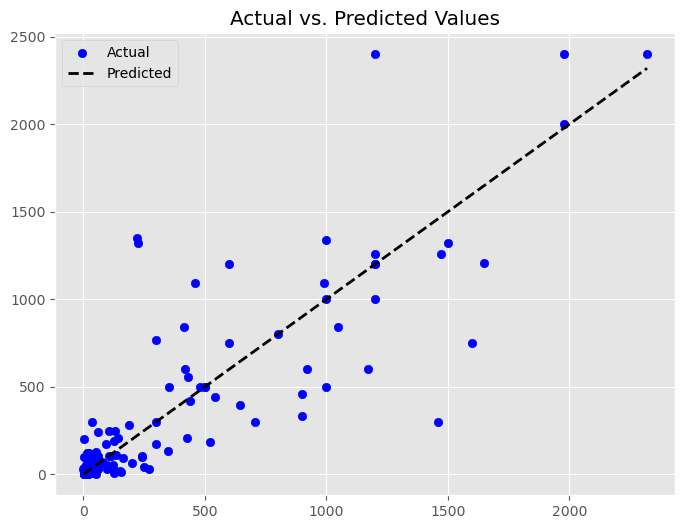

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_DTR, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Ridge

In [80]:
RR = Ridge()
RR.fit(x_train,y_train)
pred_RR = RR.predict(x_test)


r2 = RR.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_RR)
mse = mean_squared_error(y_test, pred_RR)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_RR)
evs = explained_variance_score(y_test, pred_RR)
median_err = median_absolute_error(y_test, pred_RR)
max_err = max_error(y_test, pred_RR)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.5557310110326423
Mean Absolute Error: 210.25666163384244
Mean Squared Error: 78522.68752175053
Root Mean Squared Error: 280.21899921623896
Mean Absolute Percentage Error: 4892033867328946.0
Explained Variance Score: 0.6187865516700213
Median Absolute Error: 142.0700667778609
Max Error: 1052.0492586281946


## Lasso

In [81]:
L = Lasso()
L.fit(x_train,y_train)
pred_L = L.predict(x_test)
print('R2_score',r2_score(y_test,pred_L))
print('Mean absolute error:',mean_absolute_error(y_test,pred_L))
print('Mean squared error:',mean_squared_error(y_test,pred_L))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred_L)))

r2 = L.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_L)
mse = mean_squared_error(y_test, pred_L)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_L)
evs = explained_variance_score(y_test, pred_L)
median_err = median_absolute_error(y_test, pred_L)
max_err = max_error(y_test, pred_L)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R2_score 0.6214111632117111
Mean absolute error: 210.13552323900086
Mean squared error: 77978.5418845561
Root mean squared error: 279.2463820438075
R-squared: 0.5554666858448785
Mean Absolute Error: 210.13552323900086
Mean Squared Error: 77978.5418845561
Root Mean Squared Error: 279.2463820438075
Mean Absolute Percentage Error: 4892141748626496.0
Explained Variance Score: 0.6214196280723496
Median Absolute Error: 144.31842707463136
Max Error: 1061.48044957004


## AdaBoostRegressor

In [82]:
from sklearn.model_selection import GridSearchCV

abr = AdaBoostRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0, 1.05]
}

grid_search = GridSearchCV(abr, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_params


{'learning_rate': 0.1, 'n_estimators': 100}

In [83]:
abr = AdaBoostRegressor(learning_rate=.1, n_estimators=100)
abr.fit(x_train,y_train)
pred_abr = abr.predict(x_test)

r2 = abr.score(x_train, y_train)
mae = mean_absolute_error(y_test, pred_abr)
mse = mean_squared_error(y_test, pred_abr)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, pred_abr)
msle = mean_squared_log_error(y_test, pred_abr)
evs = explained_variance_score(y_test, pred_abr)
median_err = median_absolute_error(y_test, pred_abr)
max_err = max_error(y_test, pred_abr)

print('R-squared:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('Mean Squared Logarithmic Error:', msle)
print('Explained Variance Score:', evs)
print('Median Absolute Error:', median_err)
print('Max Error:', max_err)

R-squared: 0.7725961960122726
Mean Absolute Error: 175.2393362746807
Mean Squared Error: 57706.48202074503
Root Mean Squared Error: 240.22173511309302
Mean Absolute Percentage Error: 963572438054607.8
Mean Squared Logarithmic Error: 3.4948294663752195
Explained Variance Score: 0.7509471318191044
Median Absolute Error: 124.91445020746889
Max Error: 1027.6633837471782


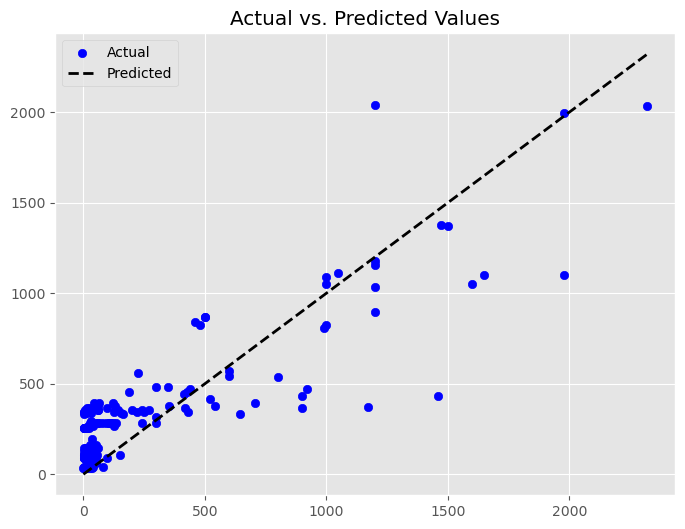

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_abr, c='blue', label='Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', linewidth=2,label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

### DecisionTreeRegressor work best

In [85]:
# Save the model as a objectfile
import joblib

joblib.dump(DTR,'Global_Power_Plant_Database')

['Global_Power_Plant_Database']

# Second model Classification Model

In [86]:
dfc=Primary_Fuel_df

In [87]:
dfc.head(10)

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,2.5,73.2407,6,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,11.0
1,98.0,74.6090,1,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
2,39.2,69.3732,7,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
5,250.0,68.6447,1,22,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
6,60.0,77.0078,3,22,2,157.558250,152.195200,61.421350,89.629600,48.327150,52.0
7,192.0,77.2070,3,22,2,674.391100,721.335200,675.724400,679.594950,579.318850,12.0
8,290.0,75.8863,3,22,2,480.594950,144.434200,402.029750,439.372100,406.377900,18.0
9,210.0,81.6373,1,22,2,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,14.0


In [88]:
dfc.sample(10)

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
468,1000.0,82.6022,1,22,2,0.00000,59.296765,2180.429000,5341.639000,6053.260000,7.0
271,420.0,83.8600,1,22,2,2498.54600,2772.820000,2885.673000,2527.017000,2738.984500,28.0
523,630.0,73.8896,1,22,2,3730.10200,3870.069500,2972.753000,2580.145000,2057.288000,42.0
502,50.0,76.7195,6,109,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,8.0
870,25.8,77.6515,1,180,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,21.0
35,5.0,71.6916,6,84,0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,21.0
647,250.0,85.0355,3,22,2,738.74770,596.462700,550.792200,758.796950,833.700550,34.0
655,22.5,76.7195,7,21,2,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,21.0
26,1.0,74.2402,6,112,0,2431.82359,2428.226946,2467.936859,2547.759305,2600.804099,21.0
787,1980.0,75.2372,1,22,2,1423.72450,2850.990000,6618.715400,7915.700000,9859.500000,7.0


## Checking Correlation 

In [89]:
dfc.corr()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.256808,-0.400430,-0.275712,0.234275,0.354727,0.404036,0.476635,0.535100,0.567374,-0.238370
longitude,0.256808,1.000000,-0.383555,-0.236233,0.264133,-0.104405,-0.074378,-0.033324,-0.019037,-0.012766,-0.080037
primary_fuel,-0.400430,-0.383555,1.000000,0.040213,-0.479057,-0.008615,-0.025061,-0.041351,-0.057391,-0.063945,0.074081
source,-0.275712,-0.236233,0.040213,1.000000,-0.498249,0.110366,0.103734,0.095918,0.087911,0.080582,-0.075219
geolocation_source,0.234275,0.264133,-0.479057,-0.498249,1.000000,-0.088501,-0.083183,-0.076916,-0.070495,-0.064618,0.051527
generation_gwh_2014,0.354727,-0.104405,-0.008615,0.110366,-0.088501,1.000000,0.915292,0.830158,0.781078,0.755210,-0.068101
generation_gwh_2015,0.404036,-0.074378,-0.025061,0.103734,-0.083183,0.915292,1.000000,0.921122,0.843400,0.821278,-0.134082
generation_gwh_2016,0.476635,-0.033324,-0.041351,0.095918,-0.076916,0.830158,0.921122,1.000000,0.931551,0.901800,-0.198926
generation_gwh_2017,0.535100,-0.019037,-0.057391,0.087911,-0.070495,0.781078,0.843400,0.931551,1.000000,0.961508,-0.231359
generation_gwh_2018,0.567374,-0.012766,-0.063945,0.080582,-0.064618,0.755210,0.821278,0.901800,0.961508,1.000000,-0.236159


<Axes: >

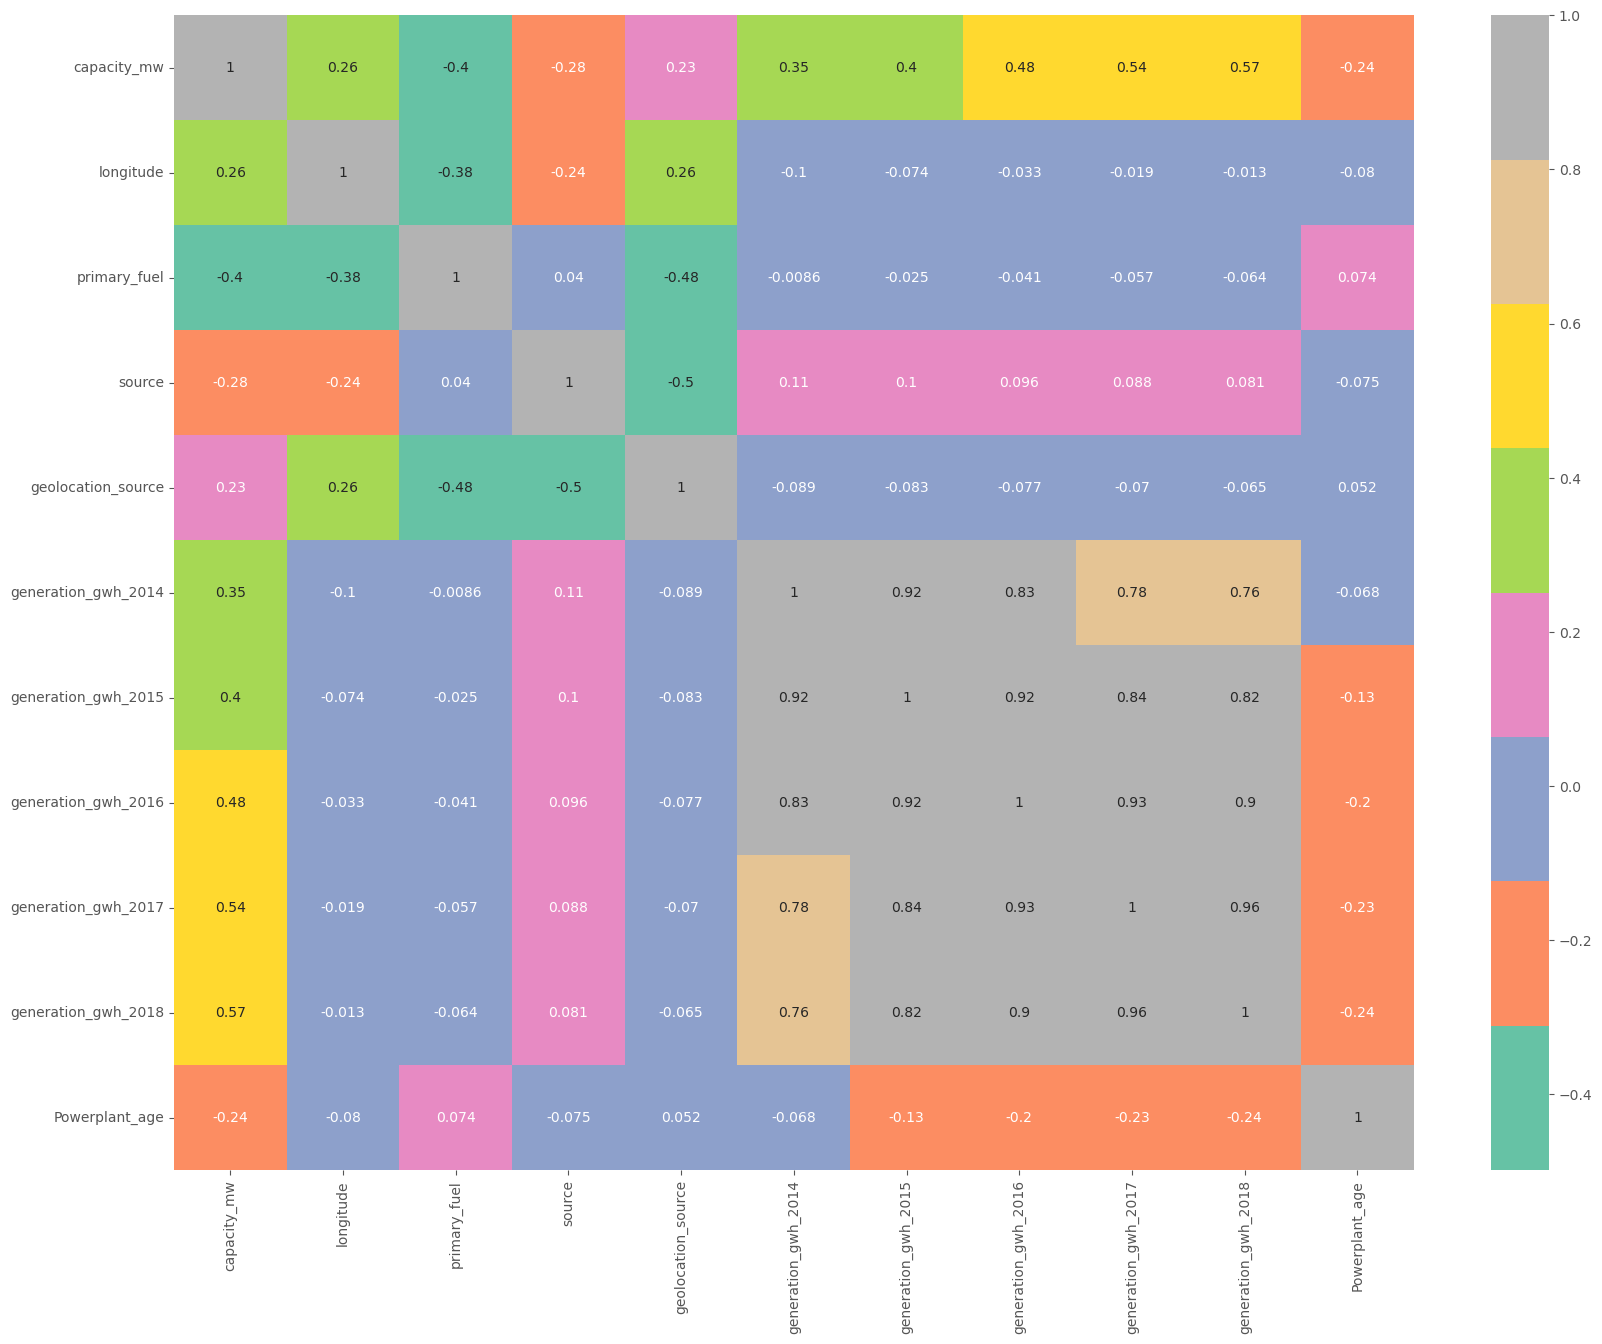

In [90]:
plt.figure(figsize=(20,15))
sns.heatmap(dfc.corr(), annot = True, linecolor="black",cmap="Set2")


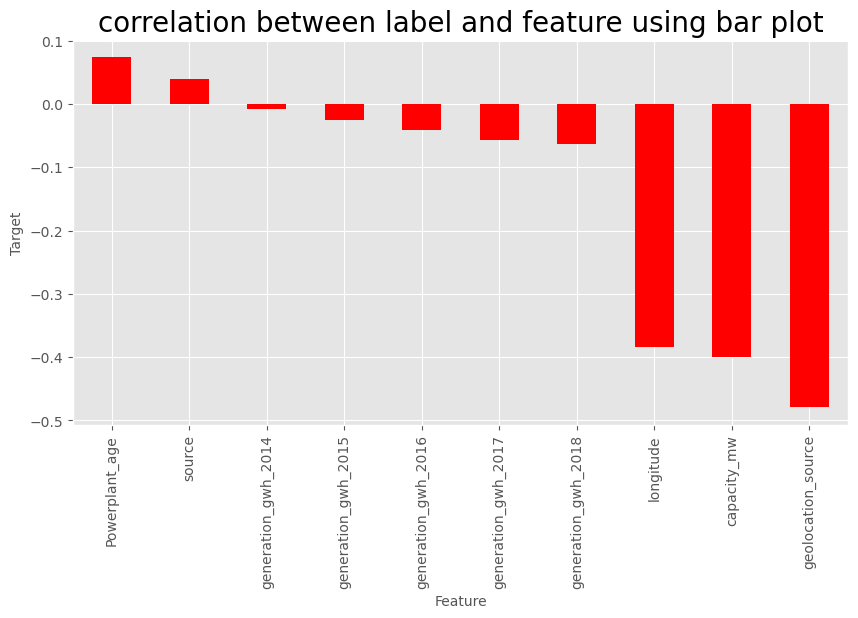

In [91]:
plt.figure(figsize=(10,5))
dfc.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

We will have to drop the columns "source" and "longitude" as this columns do not contribute much in building our mode

In [92]:
dfc.drop(columns=['source','longitude'],axis=1,inplace=True)

## Seprating features and label

In [93]:
x=dfc.drop("primary_fuel",axis=1)  
y=dfc['primary_fuel']  

## Standard Scalarization for feature scaling

we will not do Standard Scalarization beacuse in this case model predict wrong 

In [94]:
y.value_counts()

primary_fuel
1    241
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: count, dtype: int64

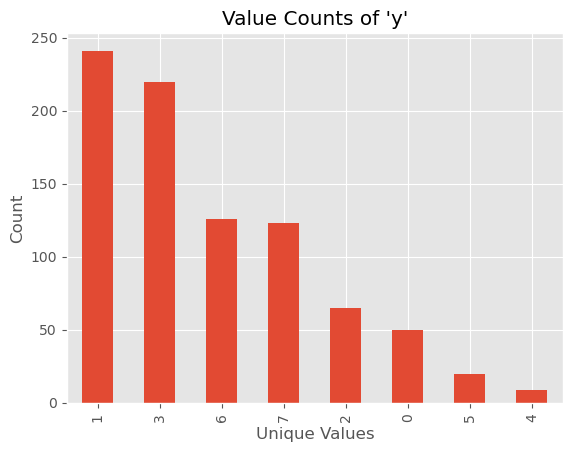

In [95]:
y.value_counts().plot(kind='bar')
plt.title("Value Counts of 'y'")
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.show()


In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=43)


In [97]:
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (683, 8)
y_train shape: (683,)
x_test shape: (171, 8)
y_test.shape: (171,)


## Checking accuracy for RandomForestClassifier

In [98]:
param_combinations = [
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'gini'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'gini'},
    {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'},
    {'n_estimators': 150, 'max_depth': 15, 'criterion': 'entropy'},
    {'n_estimators': 200, 'max_depth': 20, 'criterion': 'entropy'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'gini'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'gini'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'gini'},
    {'n_estimators': 250, 'max_depth': 25, 'criterion': 'entropy'},
    {'n_estimators': 300, 'max_depth': 30, 'criterion': 'entropy'},
    {'n_estimators': 350, 'max_depth': 35, 'criterion': 'entropy'},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    rf_classifier = RandomForestClassifier(**params, random_state=42)
    rf_classifier.fit(x_train, y_train)
    y_pred = rf_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}
Test Accuracy: 0.7134502923976608


Accuracy: 0.7251461988304093
Confusion Matrix:
 [[ 5  0  0  0  0  0  0  2]
 [ 3 26  0  4  0  0  0 11]
 [ 0  3  2  6  0  0  0  1]
 [ 0  7  0 42  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  2  0  2]
 [ 0  0  0  1  0  0 28  0]
 [ 2  3  0  0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.65      0.59      0.62        44
           2       1.00      0.17      0.29        12
           3       0.78      0.86      0.82        49
           4       0.00      0.00      0.00         1
           5       1.00      0.40      0.57         5
           6       1.00      0.97      0.98        29
           7       0.54      0.79      0.64        24

    accuracy                           0.73       171
   macro avg       0.68      0.56      0.56       171
weighted avg       0.76      0.73      0.71       171



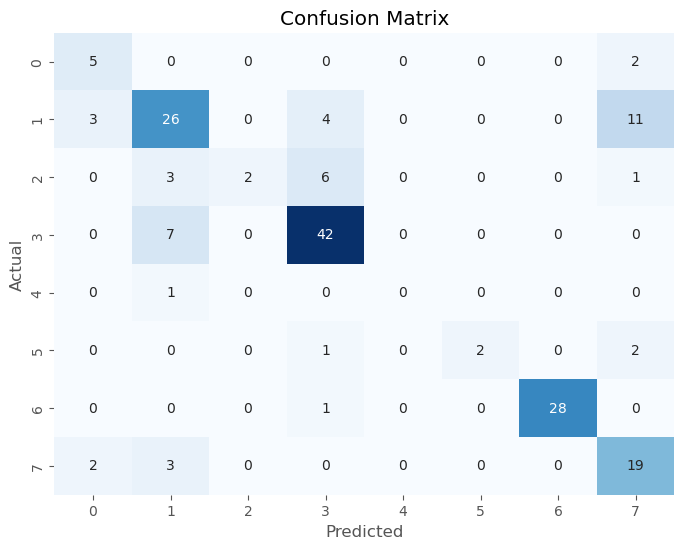

In [99]:
RFC = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

accuracy = accuracy_score(y_test, predRFC)
conf_matrix = confusion_matrix(y_test, predRFC)
class_report = classification_report(y_test, predRFC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## DecisionTreeClassifier

In [100]:
param_combinations = [
    {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 2},
    {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
    {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    dt_classifier = DecisionTreeClassifier(**params, random_state=42)
    dt_classifier.fit(x_train, y_train)
    y_pred = dt_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.6900584795321637


Accuracy: 0.6842105263157895
Confusion Matrix:
 [[ 2  3  0  0  0  0  0  2]
 [ 2 22  1  6  1  0  0 12]
 [ 0  4  4  2  0  1  0  1]
 [ 0  6  2 41  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  2]
 [ 0  0  0  2  0  0 27  0]
 [ 1  3  0  0  0  0  0 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.29      0.33         7
           1       0.56      0.50      0.53        44
           2       0.57      0.33      0.42        12
           3       0.77      0.84      0.80        49
           4       0.00      0.00      0.00         1
           5       0.50      0.20      0.29         5
           6       1.00      0.93      0.96        29
           7       0.54      0.83      0.66        24

    accuracy                           0.68       171
   macro avg       0.54      0.49      0.50       171
weighted avg       0.68      0.68      0.67       171



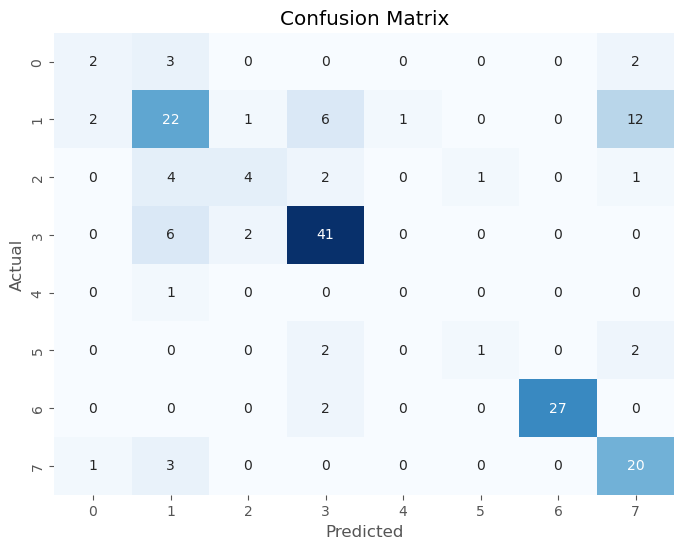

In [112]:
dtc = DecisionTreeClassifier(criterion='gini',max_depth = 10, min_samples_split=2, min_samples_leaf=1)
dtc.fit(x_train, y_train)

pred_dtc = dtc.predict(x_test)

accuracy = accuracy_score(y_test, pred_dtc)
conf_matrix = confusion_matrix(y_test, pred_dtc)
class_report = classification_report(y_test, pred_dtc)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## ExtraTreesClassifier

In [102]:
param_combinations = [
    {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 150, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'n_estimators': 200, 'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 200, 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 2},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    et_classifier = ExtraTreesClassifier(**params, random_state=42)
    et_classifier.fit(x_train, y_train)
    y_pred = et_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Test Accuracy: 0.7192982456140351


Accuracy: 0.7309941520467836
Confusion Matrix:
 [[ 4  2  0  0  0  0  0  1]
 [ 7 26  1  4  0  0  0  6]
 [ 0  4  2  5  0  0  0  1]
 [ 0  6  0 43  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  1  0  2  0  2]
 [ 0  0  0  0  0  0 29  0]
 [ 0  5  0  0  0  0  0 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.59      0.59      0.59        44
           2       0.67      0.17      0.27        12
           3       0.81      0.88      0.84        49
           4       0.00      0.00      0.00         1
           5       1.00      0.40      0.57         5
           6       1.00      1.00      1.00        29
           7       0.66      0.79      0.72        24

    accuracy                           0.73       171
   macro avg       0.64      0.55      0.55       171
weighted avg       0.74      0.73      0.72       171



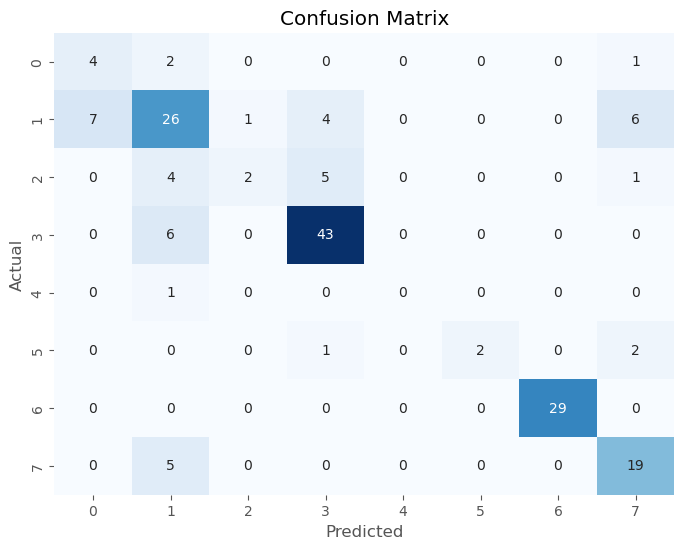

In [113]:
EXC = ExtraTreesClassifier(n_estimators=100, criterion='gini',max_depth=20,min_samples_split=2,min_samples_leaf=1)
EXC.fit(x_train, y_train)

pred_EXC = EXC.predict(x_test)

accuracy = accuracy_score(y_test, pred_EXC)
conf_matrix = confusion_matrix(y_test, pred_EXC)
class_report = classification_report(y_test, pred_EXC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## GradientBoostingClassifier

In [104]:
param_combinations = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 150, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 100, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 150, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 200, 'learning_rate': 0.05, 'max_depth': 4},
    {'n_estimators': 250, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 250, 'learning_rate': 0.05, 'max_depth': 4},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    gb_classifier = GradientBoostingClassifier(**params, random_state=42)
    gb_classifier.fit(x_train, y_train)
    y_pred = gb_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3}
Test Accuracy: 0.7309941520467836


Accuracy: 0.7251461988304093
Confusion Matrix:
 [[ 4  3  0  0  0  0  0  0]
 [ 8 29  0  3  1  0  0  3]
 [ 0  3  3  5  0  0  0  1]
 [ 0  7  1 41  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 1  0  0  1  0  2  0  1]
 [ 0  0  0  0  0  0 29  0]
 [ 2  5  0  0  0  1  0 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.57      0.36         7
           1       0.60      0.66      0.63        44
           2       0.75      0.25      0.38        12
           3       0.82      0.84      0.83        49
           4       0.00      0.00      0.00         1
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00        29
           7       0.76      0.67      0.71        24

    accuracy                           0.73       171
   macro avg       0.61      0.55      0.55       171
weighted avg       0.75      0.73      0.72       171



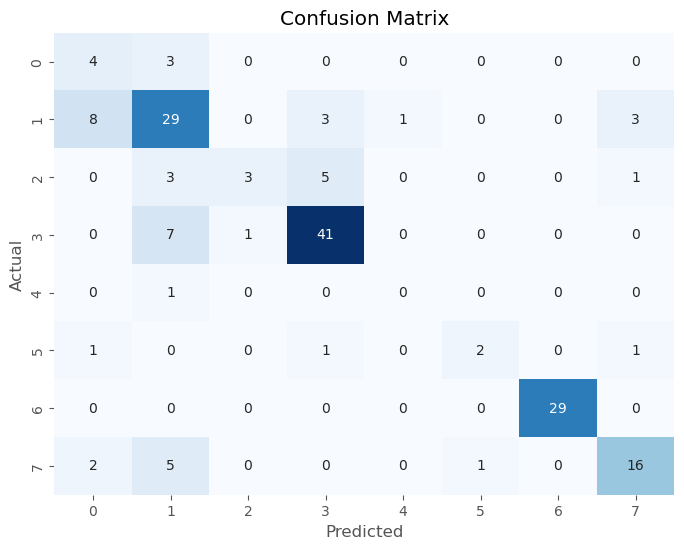

In [114]:
GBC = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3)
GBC.fit(x_train, y_train)

pred_GBC = GBC.predict(x_test)

accuracy = accuracy_score(y_test, pred_GBC)
conf_matrix = confusion_matrix(y_test, pred_GBC)
class_report = classification_report(y_test, pred_GBC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## AdaBoostClassifier

In [106]:
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 150, 'learning_rate': 0.1},
]

best_accuracy = 0
best_params = None

for params in param_combinations:
    ada_classifier = AdaBoostClassifier(**params, random_state=42)
    ada_classifier.fit(x_train, y_train)
    y_pred = ada_classifier.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Test Accuracy:", best_accuracy)


Best Parameters: {'n_estimators': 100, 'learning_rate': 0.5}
Test Accuracy: 0.5321637426900585


Accuracy: 0.5321637426900585
Confusion Matrix:
 [[ 0  0  0  0  0  0  0  7]
 [ 0 17  0 12  2  0  0 13]
 [ 0  2  3  4  0  1  0  2]
 [ 0 16  6 20  0  7  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  1  1  1  0  0  0  2]
 [ 0  0  0  0  0  0 29  0]
 [ 0  3  0  0  0  0  0 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.44      0.39      0.41        44
           2       0.30      0.25      0.27        12
           3       0.54      0.41      0.47        49
           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        29
           7       0.47      0.88      0.61        24

    accuracy                           0.53       171
   macro avg       0.38      0.49      0.41       171
weighted avg       0.53      0.53      0.52       171



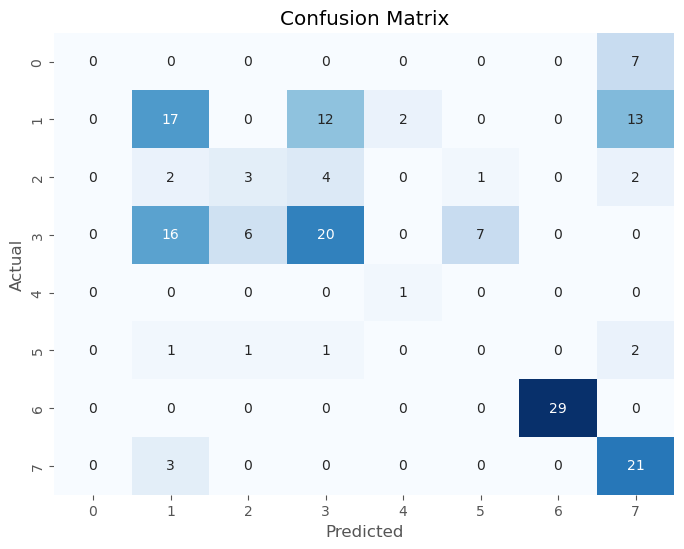

In [107]:
ABC = AdaBoostClassifier(n_estimators=100, learning_rate=0.5)
ABC.fit(x_train, y_train)
pred_ABC = ABC.predict(x_test)

accuracy = accuracy_score(y_test, pred_ABC)
conf_matrix = confusion_matrix(y_test, pred_ABC)
class_report = classification_report(y_test, pred_ABC)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## GradientBoostingClassifier work good

### Cross Validation Score

In [116]:
# Checking cv score for GBC
score = cross_val_score(GBC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, pred_GBC) - score.mean())

[0.66666667 0.71345029 0.73684211 0.67836257 0.71764706]
0.702593739250086
0.02255245958032337


In [117]:
# Save the model as a objectfile
import joblib

joblib.dump(GBC,'Global_Power_Plant_Database')

['Global_Power_Plant_Database']

In [118]:
model=joblib.load(open("Global_Power_Plant_Database","rb"))

In [119]:
dfc.head(10)

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,2.5,6,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,11.0
1,98.0,1,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
2,39.2,7,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,21.0
3,135.0,2,2,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,1,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
5,250.0,1,2,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
6,60.0,3,2,157.558250,152.195200,61.421350,89.629600,48.327150,52.0
7,192.0,3,2,674.391100,721.335200,675.724400,679.594950,579.318850,12.0
8,290.0,3,2,480.594950,144.434200,402.029750,439.372100,406.377900,18.0
9,210.0,1,2,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,14.0


In [120]:
test = (2.5,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,11.0) #taking data from 1st row of the df
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = model.predict(reshape)
print(pred)

[6]


Model is giving correct prediction